In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn=pd.read_csv('customer.csv',names=('customerID','gender','senior', 'partner','dependents','tenure','phone', 'multiline', 
                                        'internet','online security','backup','protection','support',
                                        'streamingTV','streamingmovies','contract','paperlessbill', 'paymentmeth',
                                        'monthlycharges','totalcharges','churn'),header=0)


In [3]:
churn.head(15)

customerID  gender  senior partner dependents  tenure phone  \
0   7590-VHVEG  Female       0     Yes         No       1    No   
1   5575-GNVDE    Male       0      No         No      34   Yes   
2   3668-QPYBK    Male       0      No         No       2   Yes   
3   7795-CFOCW    Male       0      No         No      45    No   
4   9237-HQITU  Female       0      No         No       2   Yes   
5   9305-CDSKC  Female       0      No         No       8   Yes   
6   1452-KIOVK    Male       0      No        Yes      22   Yes   
7   6713-OKOMC  Female       0      No         No      10    No   
8   7892-POOKP  Female       0     Yes         No      28   Yes   
9   6388-TABGU    Male       0      No        Yes      62   Yes   
10  9763-GRSKD    Male       0     Yes        Yes      13   Yes   
11  7469-LKBCI    Male       0      No         No      16   Yes   
12  8091-TTVAX    Male       0     Yes         No      58   Yes   
13  0280-XJGEX    Male       0      No         No      49   Yes   
14  5129-JLPIS    Male       0      No         No      25   Yes   

           multiline     internet      online security  ...  \
0   No phone service          DSL                   No  ...   
1                 No          DSL                  Yes  ...   
2                 No          DSL                  Yes  ...   
3   No phone service          DSL                  Yes  ...   
4                 No  Fiber optic                   No  ...   
5                Yes  Fiber optic                   No  ...   
6                Yes  Fiber optic                   No  ...   
7   No phone service          DSL                  Yes  ...   
8                Yes  Fiber optic                   No  ...   
9                 No          DSL                  Yes  ...   
10                No          DSL                  Yes  ...   
11                No           No  No internet service  ...   
12               Yes  Fiber optic                   No  ...   
13               Yes  Fiber optic                   No  ...   
14                No  Fiber optic                  Yes  ...   

             protection              support          streamingTV  \
0                    No                   No                   No   
1                   Yes                   No                   No   
2                    No                   No                   No   
3                   Yes                  Yes                   No   
4                    No                   No                   No   
5                   Yes                   No                  Yes   
6                    No                   No                  Yes   
7                    No                   No                   No   
8                   Yes                  Yes                  Yes   
9                    No                   No                   No   
10                   No                   No                   No   
11  No internet service  No internet service  No internet service   
12                  Yes                   No                  Yes   
13                  Yes                   No                  Yes   
14                  Yes                  Yes                  Yes   

        streamingmovies        contract paperlessbill  \
0                    No  Month-to-month           Yes   
1                    No        One year            No   
2                    No  Month-to-month           Yes   
3                    No        One year            No   
4                    No  Month-to-month           Yes   
5                   Yes  Month-to-month           Yes   
6                    No  Month-to-month           Yes   
7                    No  Month-to-month            No   
8                   Yes  Month-to-month           Yes   
9                    No        One year            No   
10                   No  Month-to-month           Yes   
11  No internet service        Two year            No   
12                  Yes        One year            No   
13                 

In [4]:
churn.drop(['customerID'],axis=1,inplace=True)

In [5]:
churn.columns.values

array(['gender', 'senior', 'partner', 'dependents', 'tenure', 'phone',
       'multiline', 'internet', 'online security', 'backup', 'protection',
       'support', 'streamingTV', 'streamingmovies', 'contract',
       'paperlessbill', 'paymentmeth', 'monthlycharges', 'totalcharges',
       'churn'], dtype=object)

In [6]:
churn.dtypes

gender              object
senior               int64
partner             object
dependents          object
tenure               int64
phone               object
multiline           object
internet            object
online security     object
backup              object
protection          object
support             object
streamingTV         object
streamingmovies     object
contract            object
paperlessbill       object
paymentmeth         object
monthlycharges     float64
totalcharges        object
churn               object
dtype: object

*Changing the data type of total charge column from object to float*

*Here the data type conversion is not working so there must be some special characters which are creating hinderance in conversion so stripping the data.*

In [7]:
churn['totalcharges']=churn['totalcharges'].str.strip()
#actually it was at 488 number row

In [8]:
churn['totalcharges']=pd.to_numeric(churn['totalcharges'])
#astype method cant convert blank space to numerical form
#but pd.to_numeric method generates a null value at that position

In [9]:
churn.loc[488]
#checking the 488 location again

gender                                Female
senior                                     0
partner                                  Yes
dependents                               Yes
tenure                                     0
phone                                     No
multiline                   No phone service
internet                                 DSL
online security                          Yes
backup                                    No
protection                               Yes
support                                  Yes
streamingTV                              Yes
streamingmovies                           No
contract                            Two year
paperlessbill                            Yes
paymentmeth        Bank transfer (automatic)
monthlycharges                         52.55
totalcharges                             NaN
churn                                     No
Name: 488, dtype: object

**CHECKING FOR NULL VALUES**

In [10]:
churn.isnull().sum()

gender              0
senior              0
partner             0
dependents          0
tenure              0
phone               0
multiline           0
internet            0
online security     0
backup              0
protection          0
support             0
streamingTV         0
streamingmovies     0
contract            0
paperlessbill       0
paymentmeth         0
monthlycharges      0
totalcharges       11
churn               0
dtype: int64

In [11]:
churn['totalcharges'].fillna(churn['totalcharges'].mean(),inplace=True)

In [12]:
churn.isnull().sum()

gender             0
senior             0
partner            0
dependents         0
tenure             0
phone              0
multiline          0
internet           0
online security    0
backup             0
protection         0
support            0
streamingTV        0
streamingmovies    0
contract           0
paperlessbill      0
paymentmeth        0
monthlycharges     0
totalcharges       0
churn              0
dtype: int64

**CHECKING FOR DUPLICATED VALUES**

In [13]:
#checking for duplicates in f1 and removing if any
dups=churn.duplicated(keep='first').sum()
if dups>0:
    print('There are duplicated values in this set and removing it...')
    cus=churn.drop_duplicates(keep='first')
    print('Earlier with duplicated values the shape was',churn.shape,'\nAfter removing duplocates shape become',cus.shape,
          '\nTotal of',dups,'duplicated values were dropped.')
else:
    print('There is no DUPLICATED VALUES to drop')

There are duplicated values in this set and removing it...
Earlier with duplicated values the shape was (7043, 20) 
After removing duplocates shape become (7021, 20) 
Total of 22 duplicated values were dropped.


**CHECKING NUMBER OF UNIQUE VALUES IN ATTRIBUTES**

In [14]:
for i in cus.columns:
    uniq=cus[i].nunique()
    dt=cus[i].dtypes
    print('Numbers of UNIQUE VALUE in :-',i.upper(),'=',uniq,'& data_type=',dt,'\n','______'*12,'\n')

Numbers of UNIQUE VALUE in :- GENDER = 2 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- SENIOR = 2 & data_type= int64 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- PARTNER = 2 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- DEPENDENTS = 2 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- TENURE = 73 & data_type= int64 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- PHONE = 2 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :- MULTILINE = 3 & data_type= object 
 ________________________________________________________________________ 

Numbers of UNIQUE VALUE in :

*VALUE COUNTS OF ALL THE UNIQUE VALUES*

In [15]:
lst=('gender','senior','partner','dependents','phone','multiline','internet','online security','backup','protection',
     'support','streamingTV','streamingmovies','contract','paperlessbill','paymentmeth')

In [16]:
for i in lst:
    vc=cus[i].value_counts()
    print('The VALUE COUNT of UNIQUE VALUES in ',i.upper(), 'is:\n',vc,'\n','---'*10)

The VALUE COUNT of UNIQUE VALUES in  GENDER is:
 Male      3541
Female    3480
Name: gender, dtype: int64 
 ------------------------------
The VALUE COUNT of UNIQUE VALUES in  SENIOR is:
 0    5880
1    1141
Name: senior, dtype: int64 
 ------------------------------
The VALUE COUNT of UNIQUE VALUES in  PARTNER is:
 No     3619
Yes    3402
Name: partner, dtype: int64 
 ------------------------------
The VALUE COUNT of UNIQUE VALUES in  DEPENDENTS is:
 No     4911
Yes    2110
Name: dependents, dtype: int64 
 ------------------------------
The VALUE COUNT of UNIQUE VALUES in  PHONE is:
 Yes    6339
No      682
Name: phone, dtype: int64 
 ------------------------------
The VALUE COUNT of UNIQUE VALUES in  MULTILINE is:
 No                  3368
Yes                 2971
No phone service     682
Name: multiline, dtype: int64 
 ------------------------------
The VALUE COUNT of UNIQUE VALUES in  INTERNET is:
 Fiber optic    3090
DSL            2419
No             1512
Name: internet, dtype: i

In [17]:
cus.min()

gender                                Female
senior                                     0
partner                                   No
dependents                                No
tenure                                     0
phone                                     No
multiline                                 No
internet                                 DSL
online security                           No
backup                                    No
protection                                No
support                                   No
streamingTV                               No
streamingmovies                           No
contract                      Month-to-month
paperlessbill                             No
paymentmeth        Bank transfer (automatic)
monthlycharges                         18.25
totalcharges                            18.8
churn                                     No
dtype: object

In [18]:
cus.max()

gender                     Male
senior                        1
partner                     Yes
dependents                  Yes
tenure                       72
phone                       Yes
multiline                   Yes
internet                     No
online security             Yes
backup                      Yes
protection                  Yes
support                     Yes
streamingTV                 Yes
streamingmovies             Yes
contract               Two year
paperlessbill               Yes
paymentmeth        Mailed check
monthlycharges           118.75
totalcharges             8684.8
churn                       Yes
dtype: object

In [19]:
cus.mean()

senior               0.162512
tenure              32.469449
monthlycharges      64.851894
totalcharges      2290.342338
dtype: float64

In [20]:
cus.mode()

gender  senior partner dependents  tenure phone multiline     internet  \
0   Male       0      No         No       1   Yes        No  Fiber optic   

  online security backup protection support streamingTV streamingmovies  \
0              No     No         No      No          No              No   

         contract paperlessbill       paymentmeth  monthlycharges  \
0  Month-to-month           Yes  Electronic check           20.05   

   totalcharges churn  
0   2283.300441    No

*CREATING A CROSSTABULAR VIEW*

In [21]:
lst=('gender','senior','partner','dependents','phone','multiline','internet','online security','backup','protection',
     'support','streamingTV','streamingmovies','contract','paperlessbill','paymentmeth')     

In [22]:
for i in lst:
    ctab=pd.crosstab(cus[i],cus['churn'])
    print('The CroosTabulation of--',i.upper(), 'with CHURN is:\n ',ctab,'\n','---'*10)

The CroosTabulation of-- GENDER with CHURN is:
  churn     No  Yes
gender           
Female  2546  934
Male    2618  923 
 ------------------------------
The CroosTabulation of-- SENIOR with CHURN is:
  churn     No   Yes
senior            
0       4498  1382
1        666   475 
 ------------------------------
The CroosTabulation of-- PARTNER with CHURN is:
  churn      No   Yes
partner            
No       2431  1188
Yes      2733   669 
 ------------------------------
The CroosTabulation of-- DEPENDENTS with CHURN is:
  churn         No   Yes
dependents            
No          3380  1531
Yes         1784   326 
 ------------------------------
The CroosTabulation of-- PHONE with CHURN is:
  churn    No   Yes
phone            
No      512   170
Yes    4652  1687 
 ------------------------------
The CroosTabulation of-- MULTILINE with CHURN is:
  churn               No  Yes
multiline                  
No                2531  837
No phone service   512  170
Yes               2121  850 
 

In [23]:
cus.groupby(cus['churn']).mean()

senior     tenure  monthlycharges  totalcharges
churn                                                   
No     0.128970  37.640782       61.344878   2559.674149
Yes    0.255789  18.088853       74.604308   1541.376548

In [24]:
cus.describe()

senior       tenure  monthlycharges  totalcharges
count  7021.000000  7021.000000     7021.000000   7021.000000
mean      0.162512    32.469449       64.851894   2290.342338
std       0.368947    24.534965       30.069001   2265.044153
min       0.000000     0.000000       18.250000     18.800000
25%       0.000000     9.000000       35.750000    411.150000
50%       0.000000    29.000000       70.400000   1410.250000
75%       0.000000    55.000000       89.900000   3801.700000
max       1.000000    72.000000      118.750000   8684.800000

In [25]:
cus.describe(include='object')

gender partner dependents phone multiline     internet online security  \
count    7021    7021       7021  7021      7021         7021            7021   
unique      2       2          2     2         3            3               3   
top      Male      No         No   Yes        No  Fiber optic              No   
freq     3541    3619       4911  6339      3368         3090            3490   

       backup protection support streamingTV streamingmovies        contract  \
count    7021       7021    7021        7021            7021            7021   
unique      3          3       3           3               3               3   
top        No         No      No          No              No  Month-to-month   
freq     3080       3087    3465        2802            2777            3853   

       paperlessbill       paymentmeth churn  
count           7021              7021  7021  
unique             2                 4     2  
top              Yes  Electronic check    No  
freq            4161              2359  5164

**GRAPHICAL METHODS FOR INDEPTH ANALYSIS**

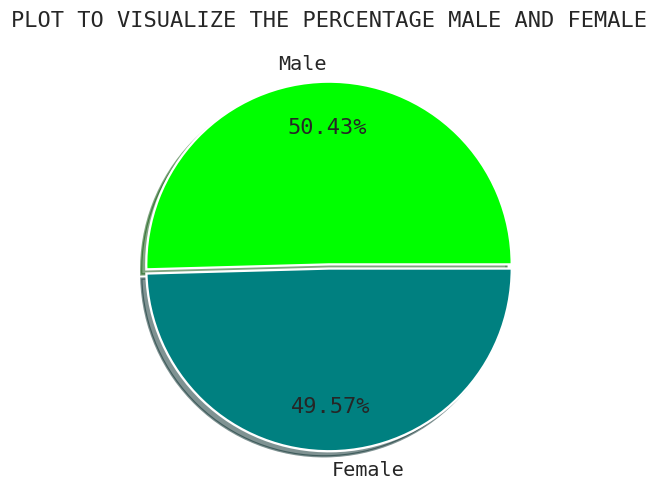

In [26]:
cus_lb=cus['gender'].value_counts().index.tolist()
cus_val=cus['gender'].value_counts().values.tolist()
exp=(0.010,0.015)
clr=('lime','teal')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.2F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE MALE AND FEMALE\n')
plt.show()

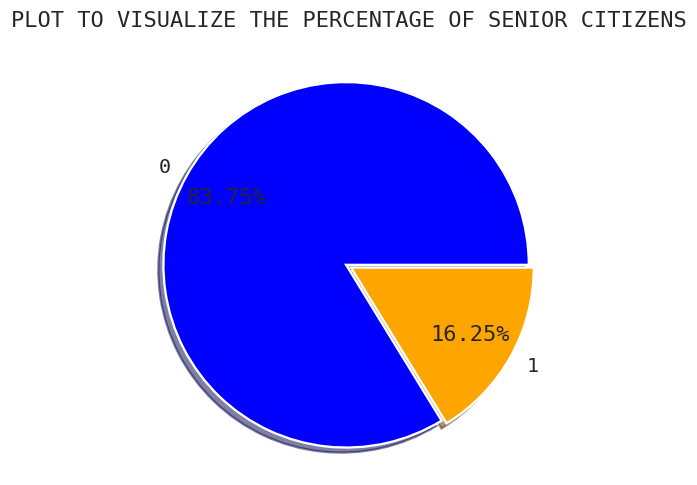

In [27]:
cus_lb=cus['senior'].value_counts().index.tolist()
cus_val=cus['senior'].value_counts().values.tolist()
exp=(0.019,0.015)
clr=('blue','orange')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.2F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF SENIOR CITIZENS\n')
plt.show()

            THE PERCENTAGE OF SENIOR CITIZENS IS LOW AS COMPARED TO YOUNG PEOPLE

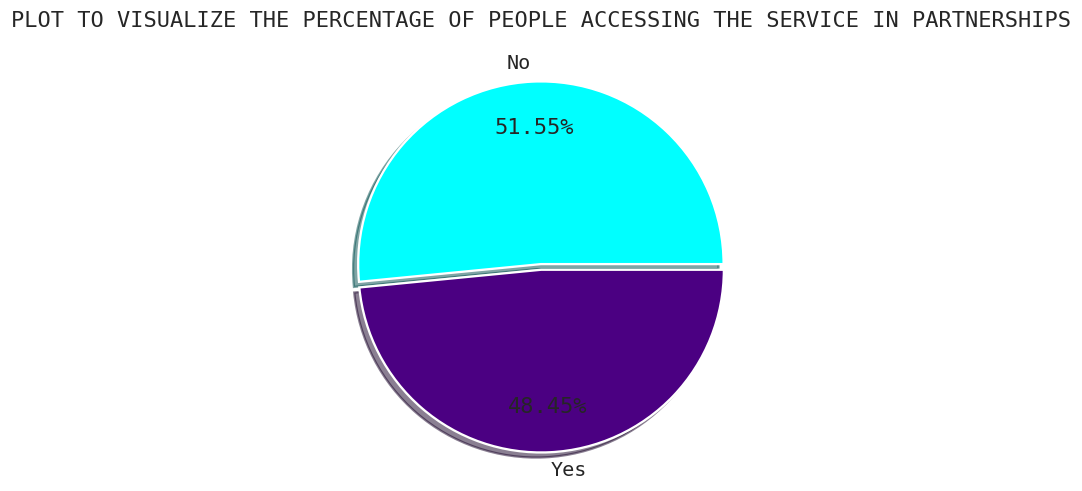

In [28]:
cus_lb=cus['partner'].value_counts().index.tolist()
cus_val=cus['partner'].value_counts().values.tolist()
exp=(0.015,0.019)
clr=('aqua','indigo')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.2F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE ACCESSING THE SERVICE IN PARTNERSHIPS\n')
plt.show()

                                        FEW PEOPLE ACCESS THE SERVICE IN PARTNERSHIP

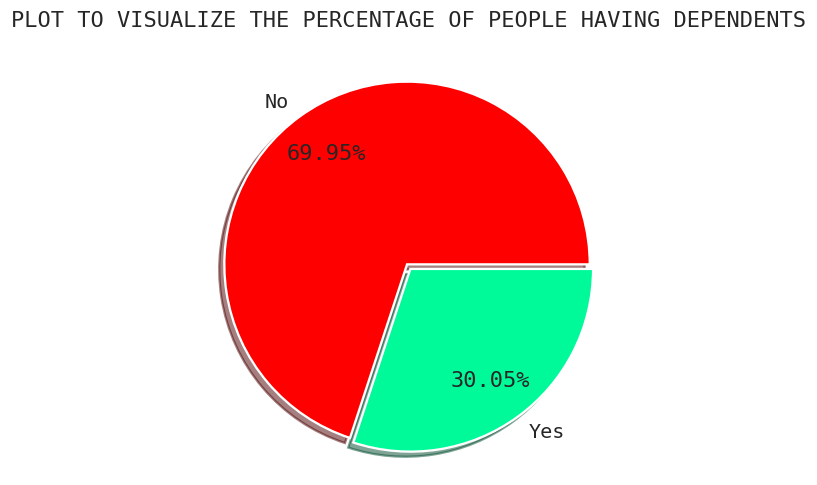

In [29]:
cus_lb=cus['dependents'].value_counts().index.tolist()
cus_val=cus['dependents'].value_counts().values.tolist()
exp=(0.015,0.019)
clr=('red','mediumspringgreen')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.2F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE HAVING DEPENDENTS\n')
plt.show()

                            VERY LESS PERCENTAGE OF PEOPLE HAVE DEPENDENTS

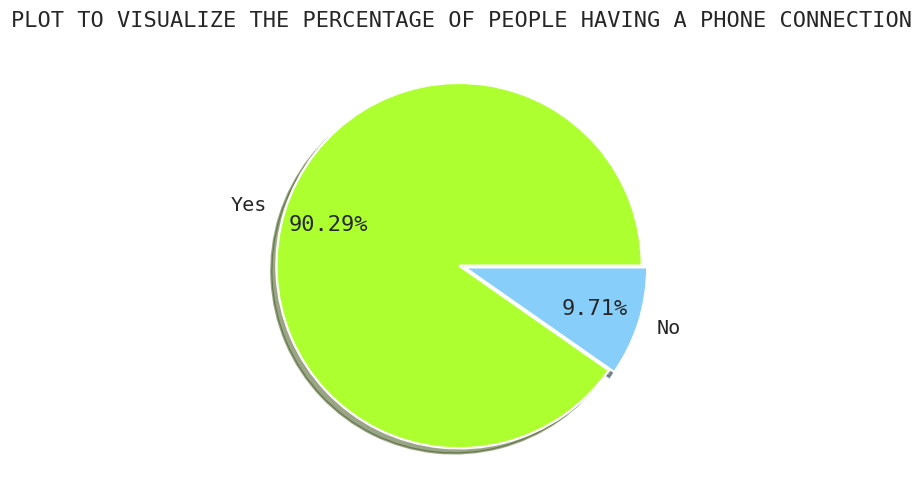

In [30]:
cus_lb=cus['phone'].value_counts().index.tolist()
cus_val=cus['phone'].value_counts().values.tolist()
exp=(0.015,0.019)
clr=('greenyellow','lightskyblue')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.2F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE HAVING A PHONE CONNECTION\n')
plt.show()

                                    A LARGER PERCENTAGE OF PEOPLE HAVE A PHONE CONNECTION

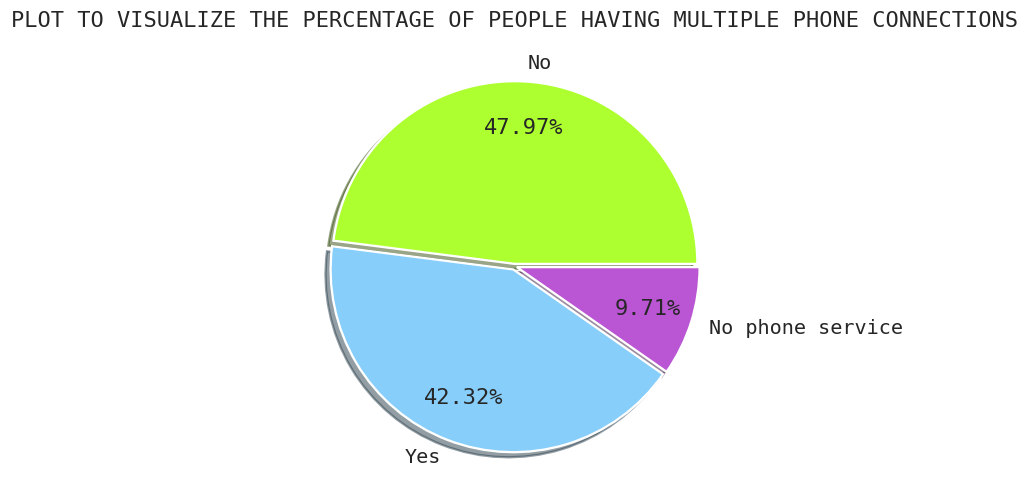

In [31]:
cus_lb=cus['multiline'].value_counts().index.tolist()
cus_val=cus['multiline'].value_counts().values.tolist()
exp=(0.015,0.020,0.015)
clr=('greenyellow','lightskyblue','mediumorchid')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.2F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE HAVING MULTIPLE PHONE CONNECTIONS\n')
plt.show()

                            A LARGER PERCENTAGE OF PEOPLE HAVE ONLY A SINGLE CONNECTION

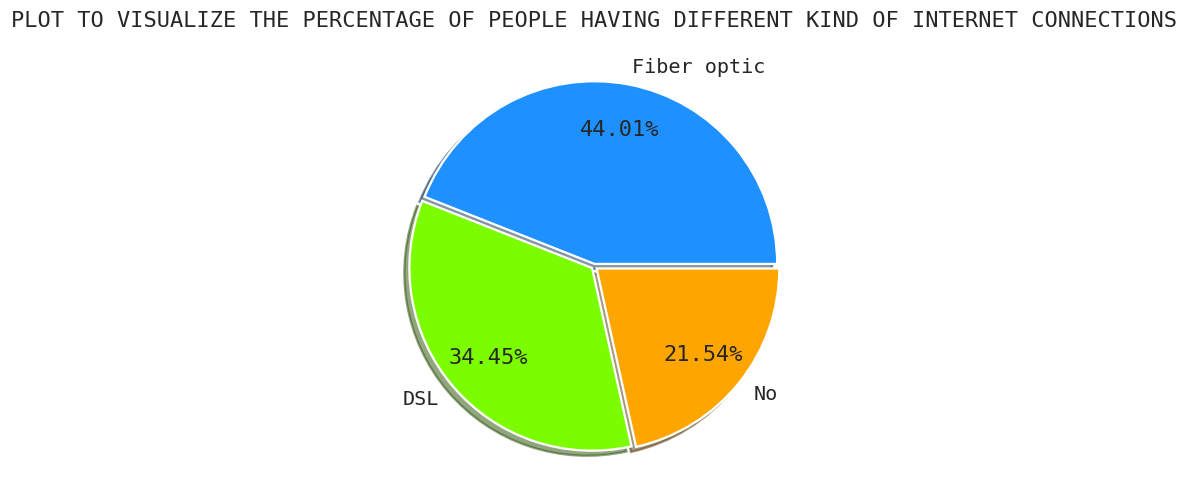

In [32]:
cus_lb=cus['internet'].value_counts().index.tolist()
cus_val=cus['internet'].value_counts().values.tolist()
exp=(0.015,0.015,0.020)
clr=('dodgerblue','lawngreen','orange')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.2F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE HAVING DIFFERENT KIND OF INTERNET CONNECTIONS\n')
plt.show()

                                    MOST OF THE PEOPLE HAVE FIBER OPTICS CONNECTION

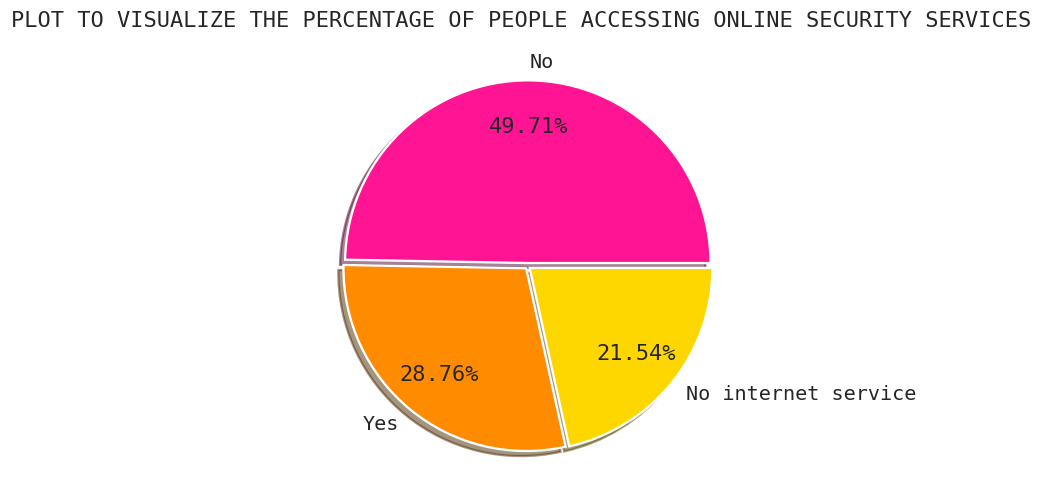

In [33]:
cus_lb=cus['online security'].value_counts().index.tolist()
cus_val=cus['online security'].value_counts().values.tolist()
exp=(0.020,0.015,0.015)
clr=('deeppink','darkorange','gold')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.2F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE ACCESSING ONLINE SECURITY SERVICES \n')
plt.show()

                                MAJOR PERCENTAGE DON'T OPT FOR ONLINE SECURTIY SERVICES

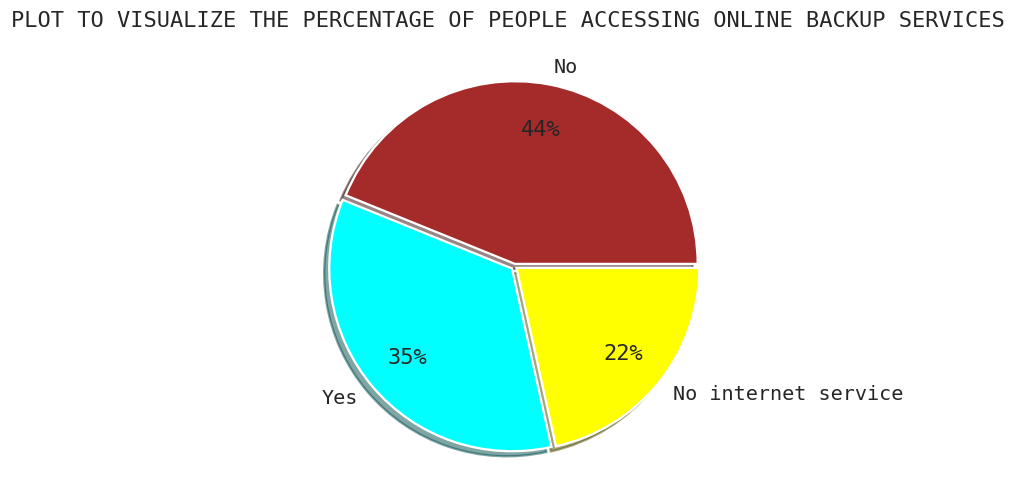

In [34]:
cus_lb=cus['backup'].value_counts().index.tolist()
cus_val=cus['backup'].value_counts().values.tolist()
exp=(0.015,0.020,0.015)
clr=('brown','cyan','yellow')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE ACCESSING ONLINE BACKUP SERVICES \n')
plt.show()

                                    ONLY 35% OF PEOPLE USE THE BACKUP SERVICE

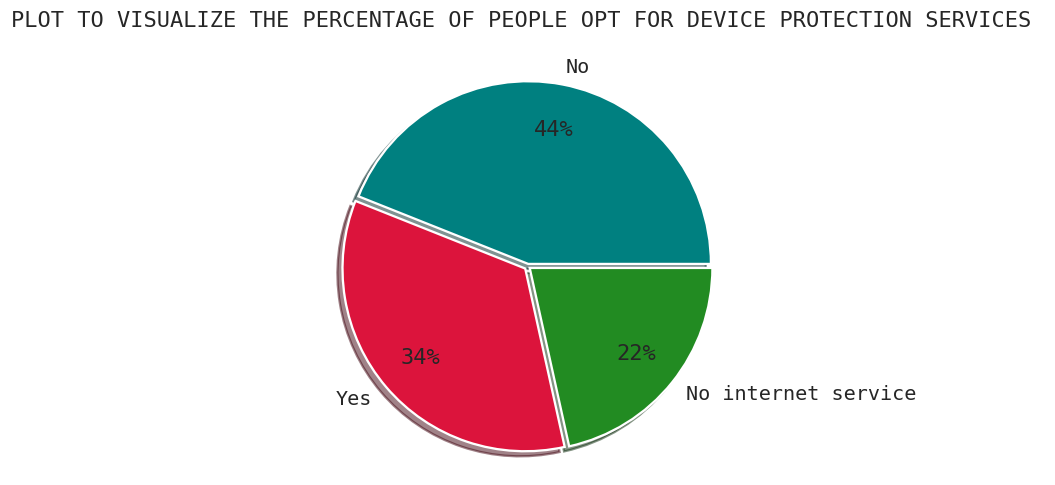

In [35]:
cus_lb=cus['protection'].value_counts().index.tolist()
cus_val=cus['protection'].value_counts().values.tolist()
exp=(0.015,0.020,0.015)
clr=('teal','crimson','forestgreen')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE OPT FOR DEVICE PROTECTION SERVICES \n')
plt.show()

                            LARGER PERCENT OF PEOPLE DON'T OPT FOR DEVICE PROTECTION SCHEME

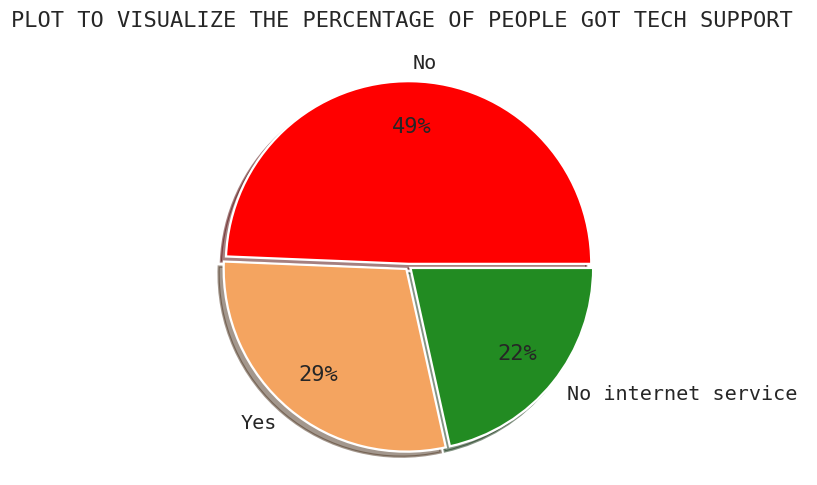

In [36]:
cus_lb=cus['support'].value_counts().index.tolist()
cus_val=cus['support'].value_counts().values.tolist()
exp=(0.015,0.020,0.015)
clr=('red','sandybrown','forestgreen')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE GOT TECH SUPPORT \n')
plt.show()

                                TECH SUPPORT IS A NO FOR 49% OF PEOPLE

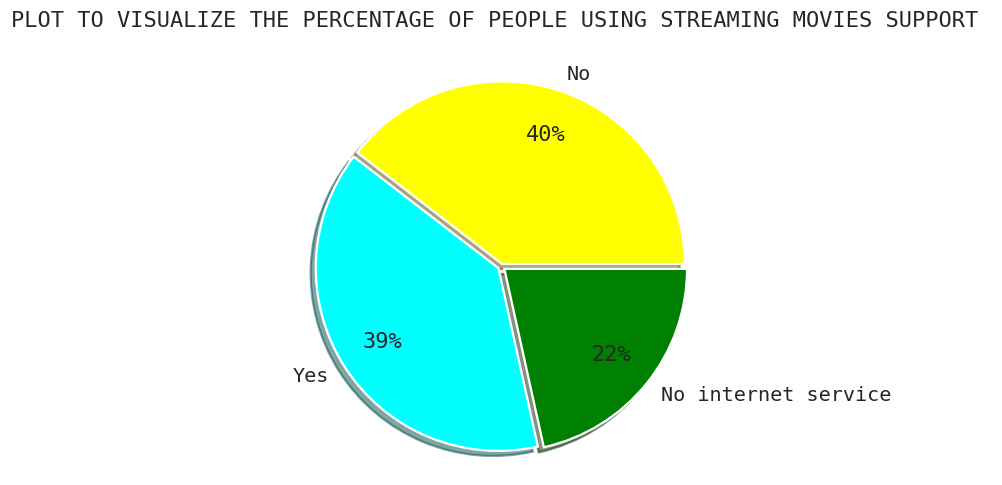

In [37]:
cus_lb=cus['streamingmovies'].value_counts().index.tolist()
cus_val=cus['streamingmovies'].value_counts().values.tolist()
exp=(0.015,0.020,0.024)
clr=('yellow','aqua','green')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE USING STREAMING MOVIES SUPPORT \n')
plt.show()

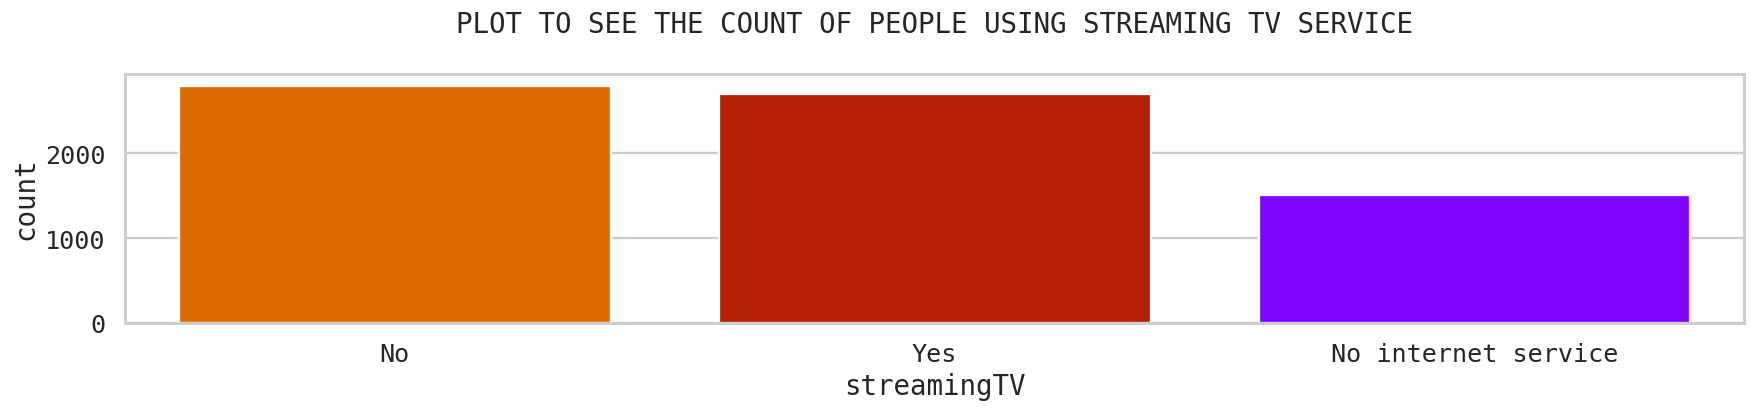

In [38]:
plt.figure(figsize=(19,3),dpi=110)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1)
sns.countplot(x='streamingTV',data=cus,orient='v',palette='gnuplot_r',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF PEOPLE USING STREAMING TV SERVICE\n')
plt.show()

                                        MOST PEOPLE DON'T USE STREAMING_TV SERVICE

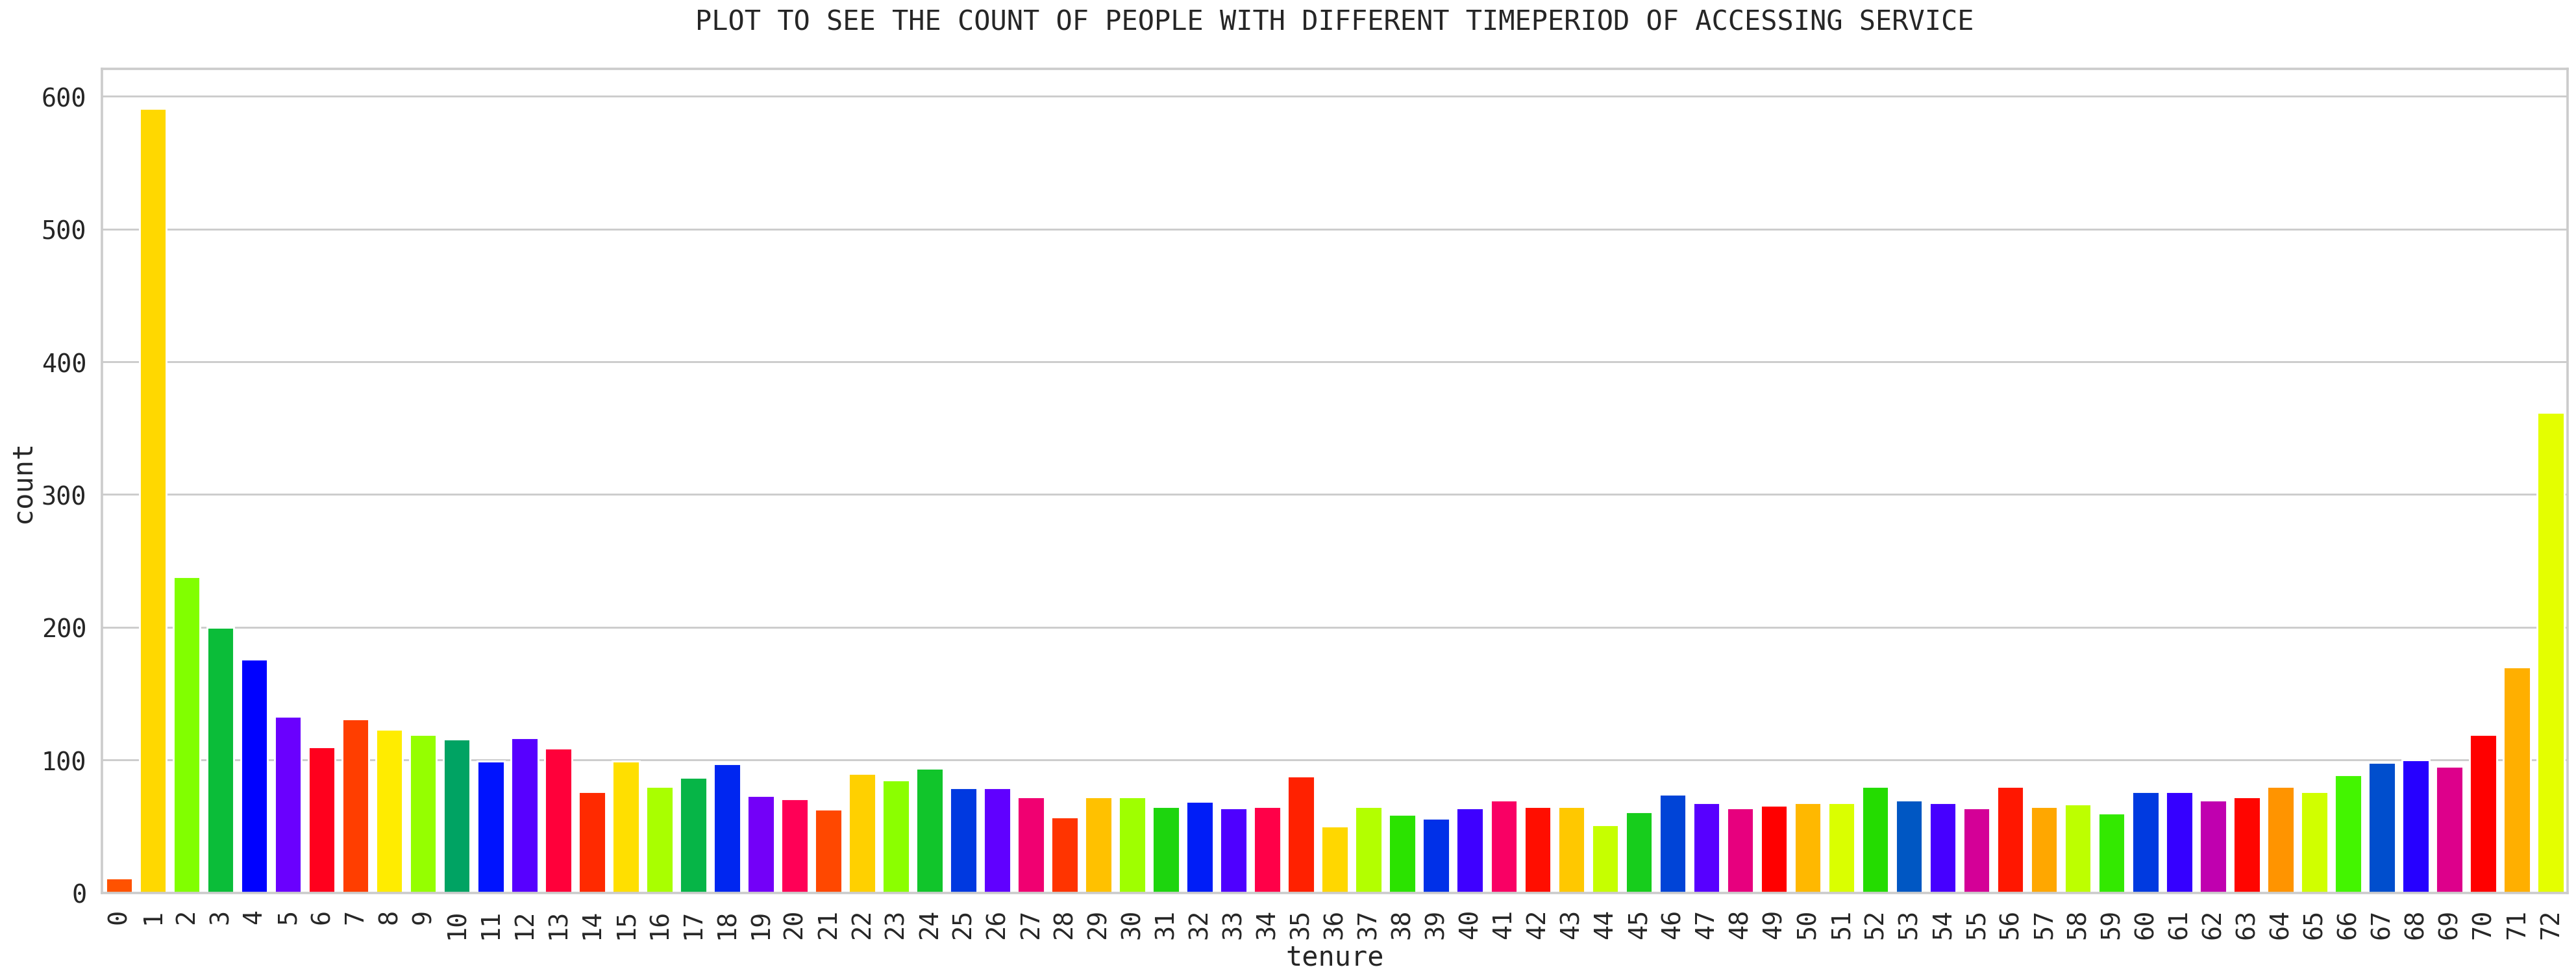

In [39]:
plt.figure(figsize=(35,12),dpi=140)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.2)
m=sns.countplot(x='tenure',data=cus,orient='v',palette='prism',saturation=25)
m.set_xticklabels(m.get_xticklabels(),rotation=90)
plt.title('PLOT TO SEE THE COUNT OF PEOPLE WITH DIFFERENT TIMEPERIOD OF ACCESSING SERVICE\n')
plt.show()

                                    HIGHER NUMBER OF PEOPLE USE THE SERVICE FOR A MONTH

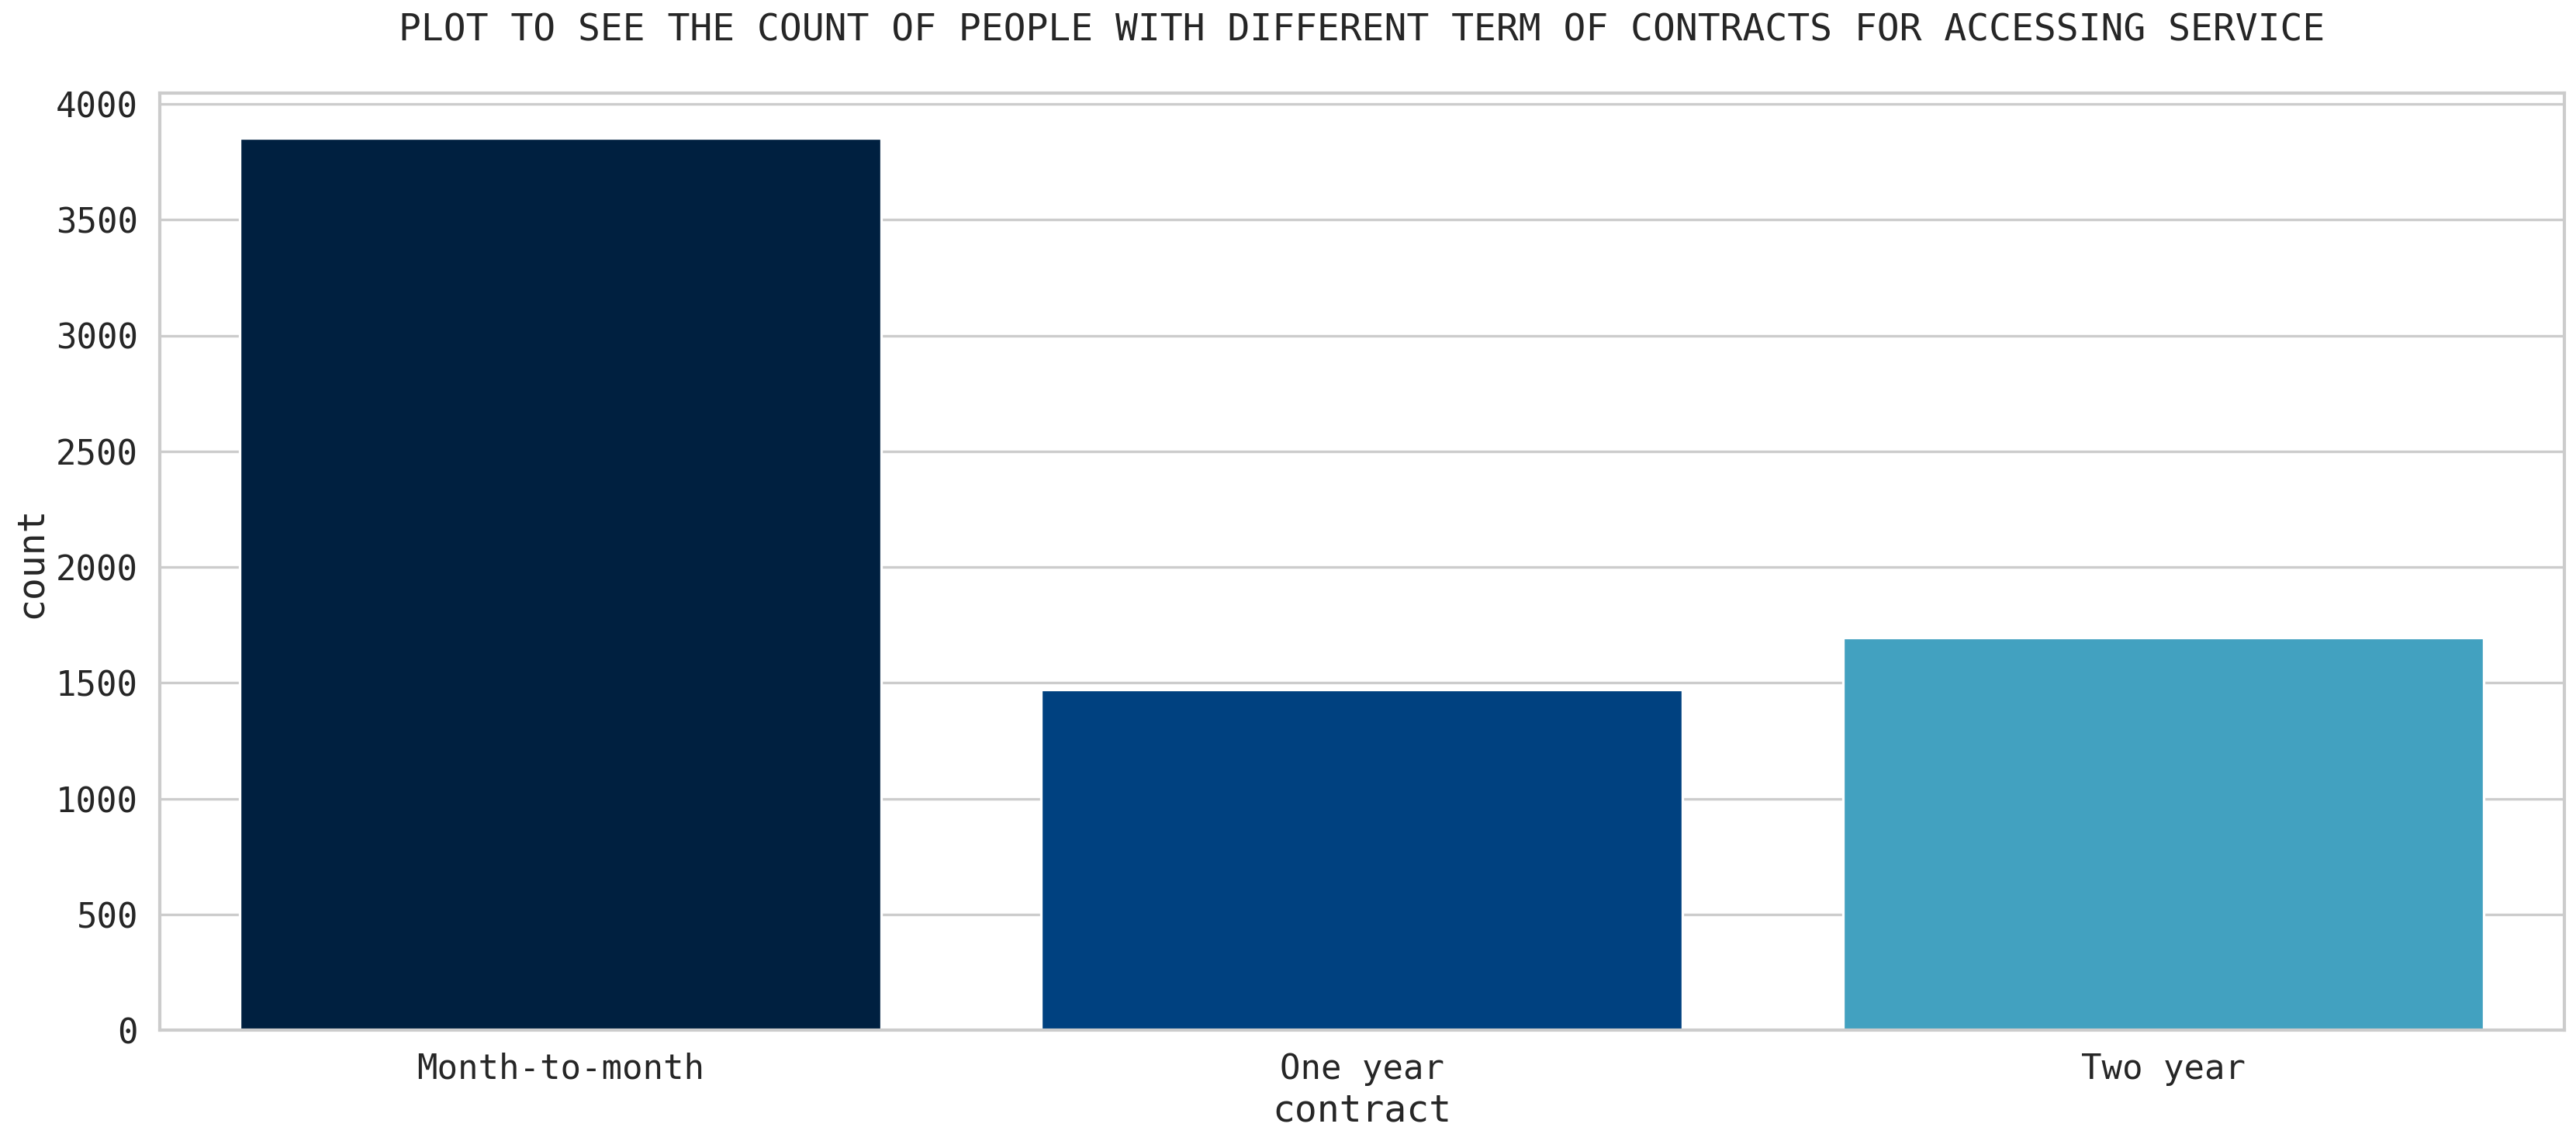

In [40]:
plt.figure(figsize=(25,10),dpi=160)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.2)
sns.countplot(x='contract',data=cus,orient='v',palette='ocean',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF PEOPLE WITH DIFFERENT TERM OF CONTRACTS FOR ACCESSING SERVICE\n')
plt.show()

                                MOST OF THE PEOPLE OPT FOR MONTHLY CONTRACT

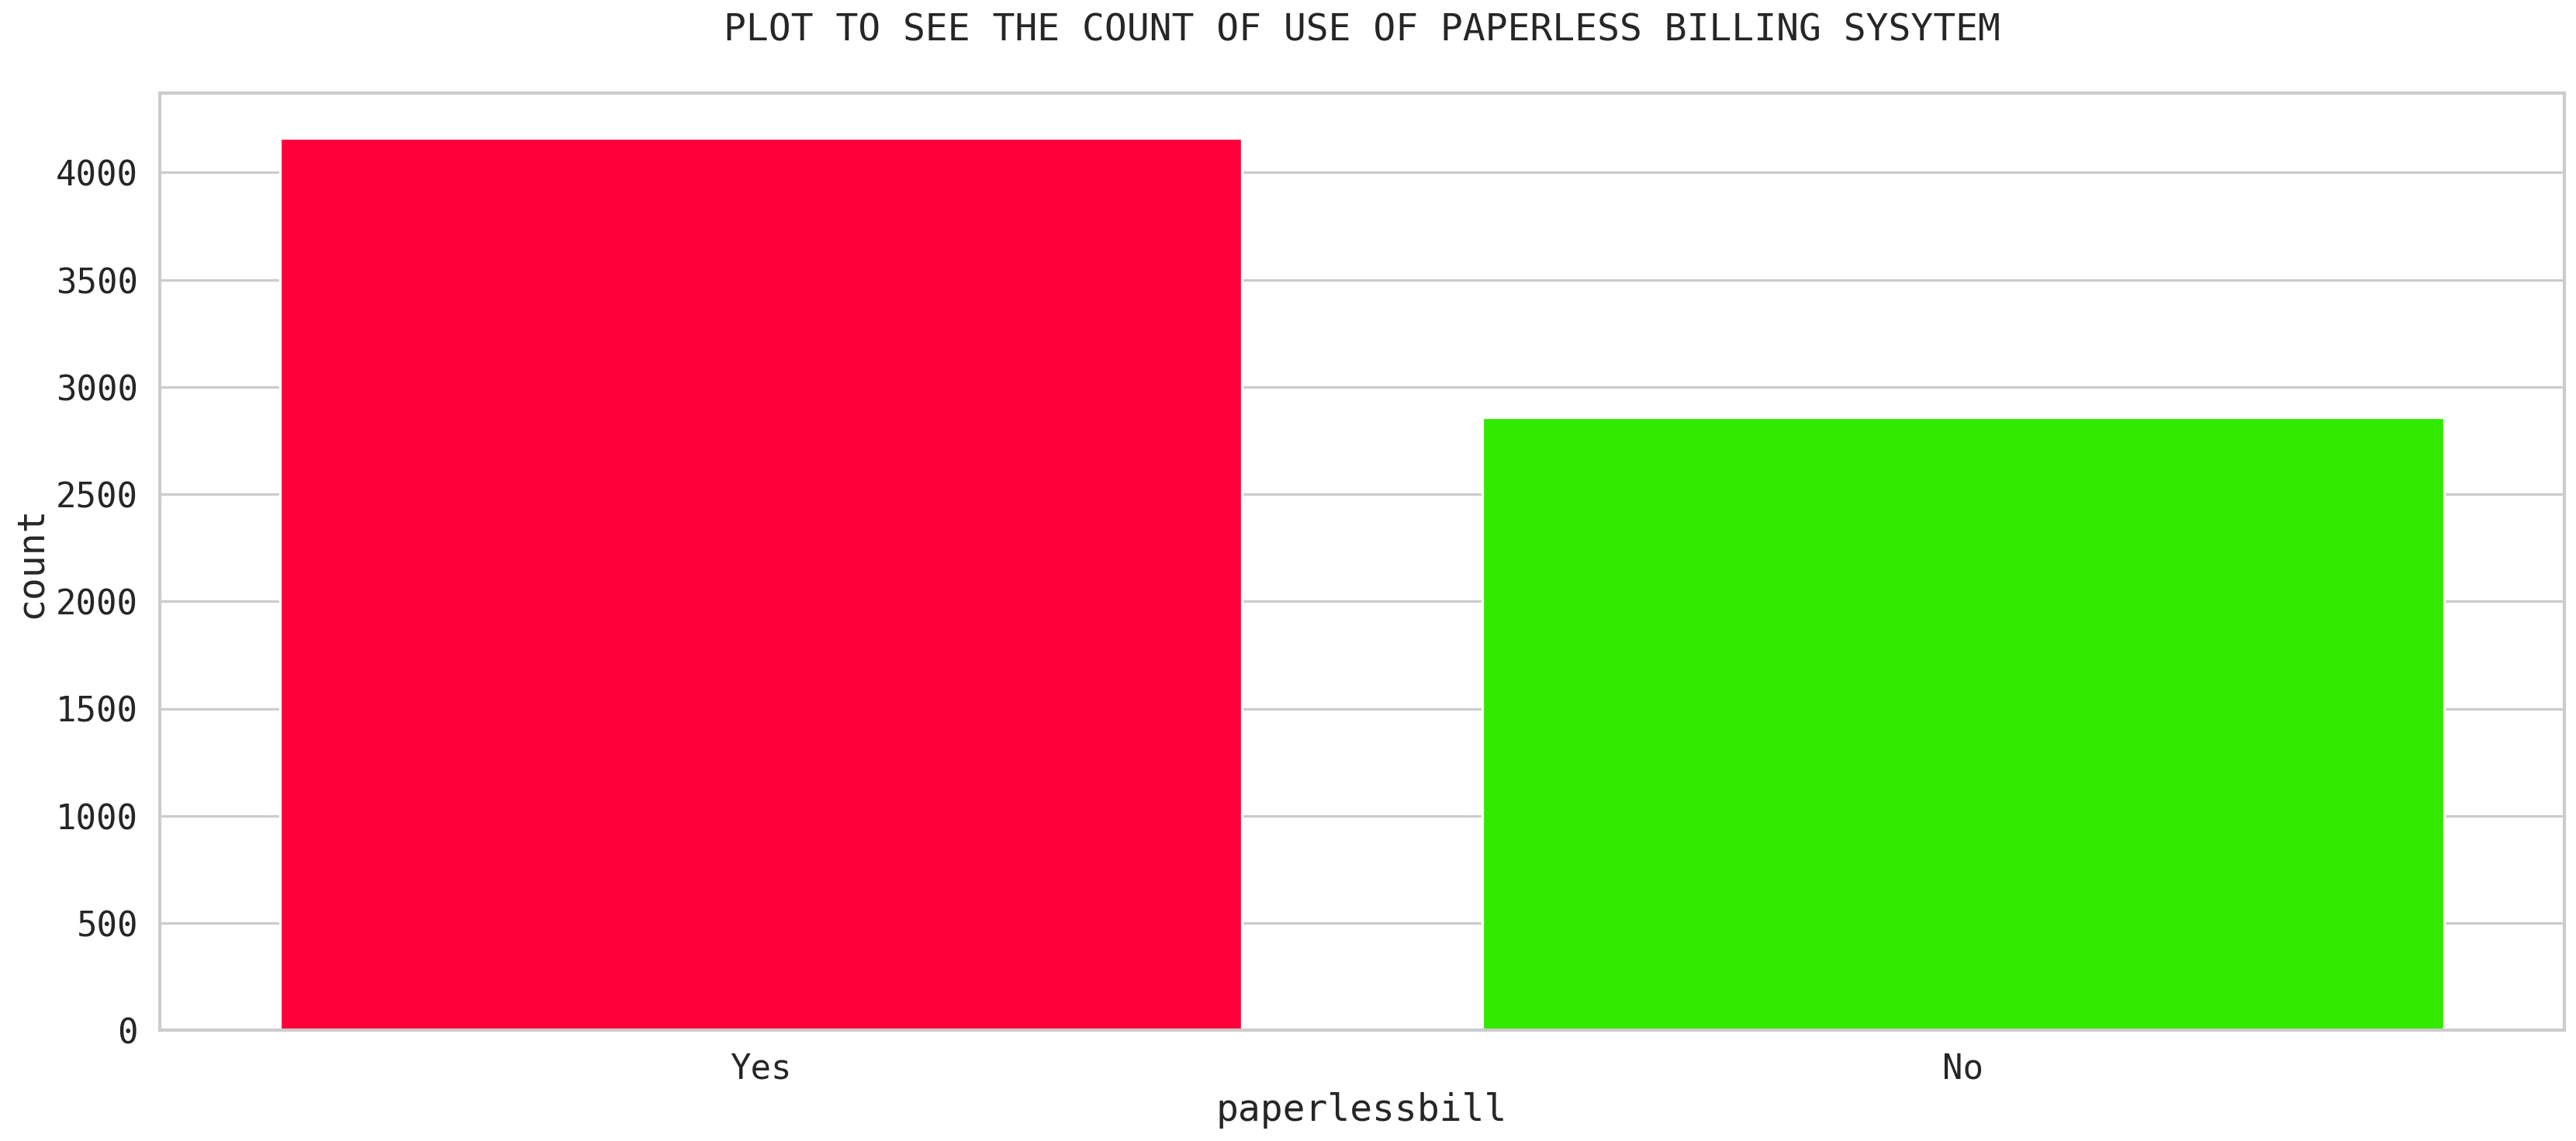

In [41]:
plt.figure(figsize=(25,10),dpi=160)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.2)
sns.countplot(x='paperlessbill',data=cus,orient='v',palette='prism_r',saturation=25)
plt.title('PLOT TO SEE THE COUNT OF USE OF PAPERLESS BILLING SYSYTEM\n')
plt.show()

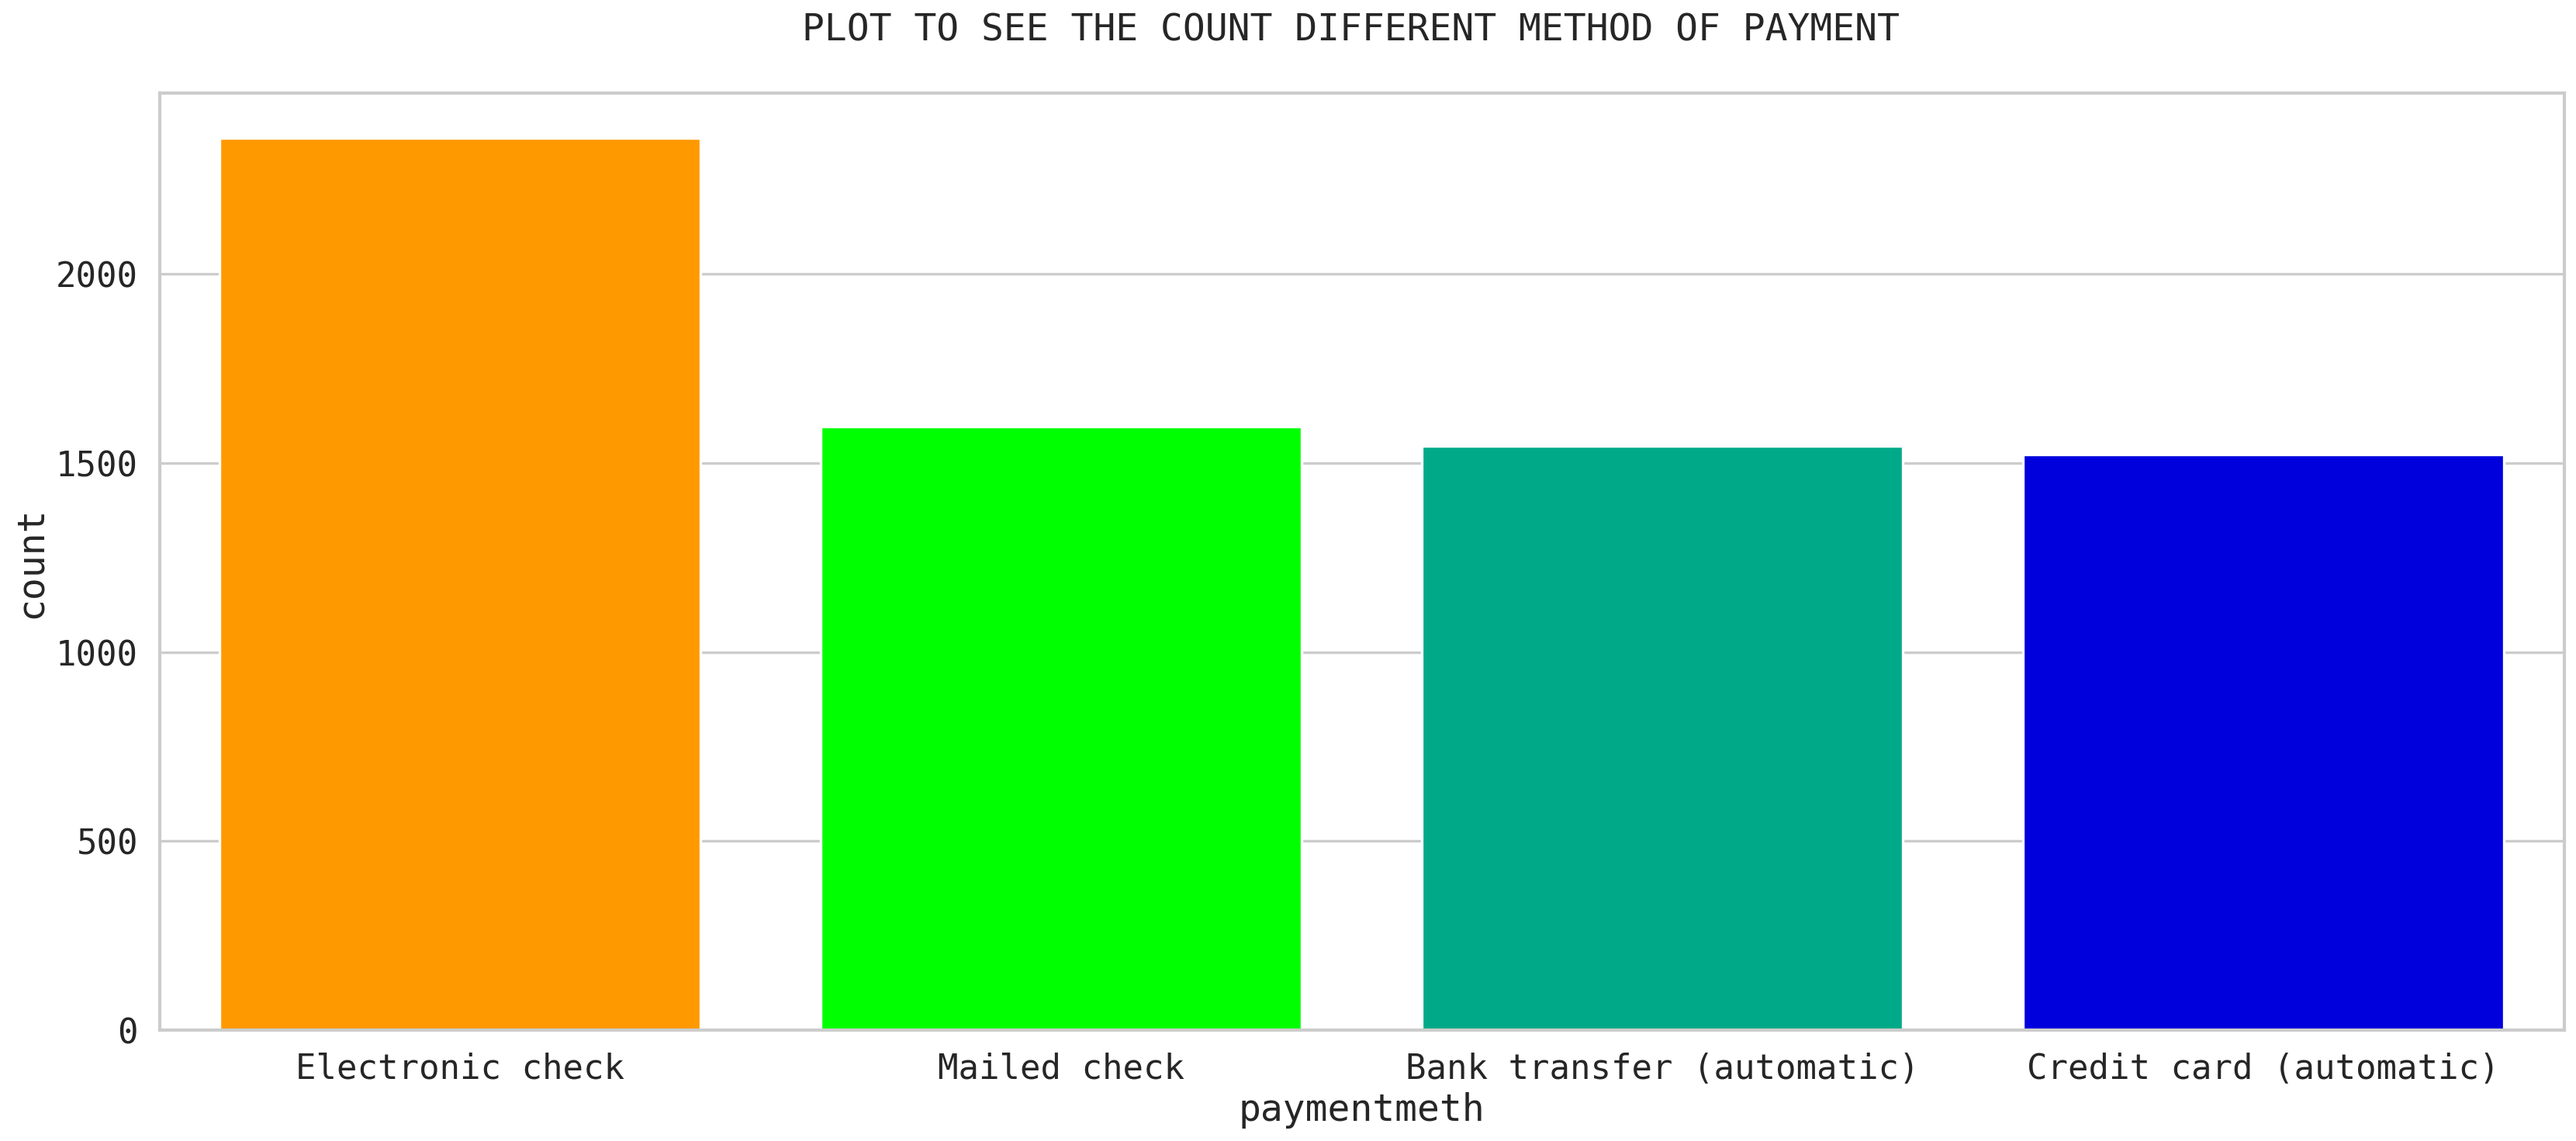

In [42]:
plt.figure(figsize=(25,10),dpi=160)
sns.set(context='talk',style='whitegrid',palette='bright',font='monospace',font_scale=1.2)
sns.countplot(x='paymentmeth',data=cus,orient='v',palette='nipy_spectral_r',saturation=25)
plt.title('PLOT TO SEE THE COUNT DIFFERENT METHOD OF PAYMENT \n')
plt.show()

                        HIGHER PERCENTAGE OF BILL IS COMING THROUGH ELECTRONIC CHECK CHANNEL

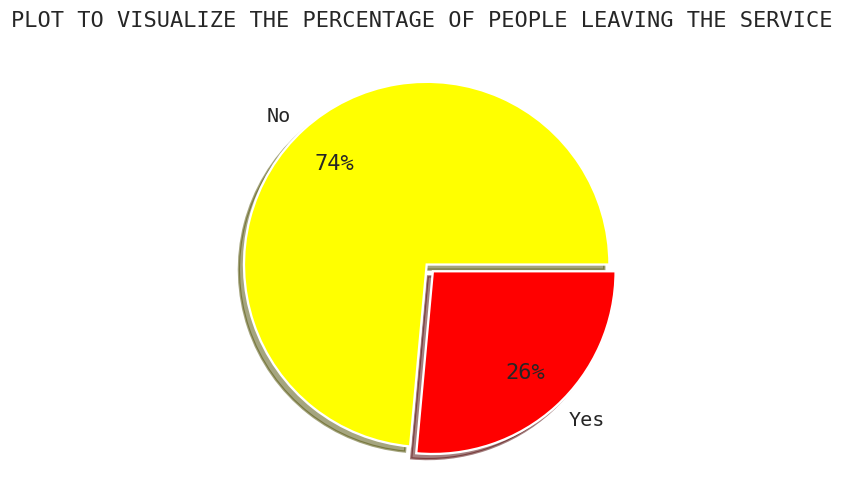

In [43]:
cus_lb=cus['churn'].value_counts().index.tolist()
cus_val=cus['churn'].value_counts().values.tolist()
exp=(0.015,0.040)
clr=('yellow','red')
plt.figure(figsize=(10,5),dpi=110)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
plt.pie(x=cus_val,explode=exp,labels=cus_lb,colors=clr,autopct='%2.F%%',pctdistance=0.75, shadow=True,radius=1.1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF PEOPLE LEAVING THE SERVICE \n')
plt.show()

                        ONLY 26% OF PEOPLE HAVE DROPPED USING THE SERVICE

**USING LABEL ENCODER & MAPPING FUNCTION TO ENCODE THE OBJECT TYPE DATA INTO NUMERICAL FORM**

In [44]:
#mapping 1 and 0 to Yes and No values of attributes
mp={'Yes':1,'No':0}
cus['partner']=cus['partner'].map(mp)
cus['dependents']=cus['dependents'].map(mp)
cus['phone']=cus['phone'].map(mp)
cus['paperlessbill']=cus['paperlessbill'].map(mp)
cus['churn']=cus['churn'].map(mp)

In [45]:
for i in cus.columns:
    dtp=cus[i].dtypes
    if dtp=='object':
        ll=LabelEncoder()
        cus[i]=ll.fit_transform(cus[i])

In [46]:
cus.dtypes

gender               int32
senior               int64
partner              int64
dependents           int64
tenure               int64
phone                int64
multiline            int32
internet             int32
online security      int32
backup               int32
protection           int32
support              int32
streamingTV          int32
streamingmovies      int32
contract             int32
paperlessbill        int64
paymentmeth          int32
monthlycharges     float64
totalcharges       float64
churn                int64
dtype: object

In [47]:
cus.head(12)

gender  senior  partner  dependents  tenure  phone  multiline  internet  \
0        0       0        1           0       1      0          1         0   
1        1       0        0           0      34      1          0         0   
2        1       0        0           0       2      1          0         0   
3        1       0        0           0      45      0          1         0   
4        0       0        0           0       2      1          0         1   
5        0       0        0           0       8      1          2         1   
6        1       0        0           1      22      1          2         1   
7        0       0        0           0      10      0          1         0   
8        0       0        1           0      28      1          2         1   
9        1       0        0           1      62      1          0         0   
10       1       0        1           1      13      1          0         0   
11       1       0        0           0      16      1          0         2   

    online security  backup  protection  support  streamingTV  \
0                 0       2           0        0            0   
1                 2       0           2        0            0   
2                 2       2           0        0            0   
3                 2       0           2        2            0   
4                 0       0           0        0            0   
5                 0       0           2        0            2   
6                 0       2           0        0            2   
7                 2       0           0        0            0   
8                 0       0           2        2            2   
9                 2       2           0        0            0   
10                2       0           0        0            0   
11                1       1           1        1            1   

    streamingmovies  contract  paperlessbill  paymentmeth  monthlycharges  \
0                 0         0              1            2           29.85   
1                 0         1              0            3           56.95   
2                 0         0              1            3           53.85   
3                 0         1              0            0           42.30   
4                 0         0              1            2           70.70   
5                 2         0              1            2           99.65   
6                 0         0              1            1           89.10   
7                 0         0              0            3           29.75   
8                 2         0              1            2          104.80   
9                 0         1              0            0           56.15   
10                0         0              1            3           49.95   
11                1         2              0            1           18.95   

    totalcharges  churn  
0          29.85      0  
1        1889.50      0  
2         108.15      1  
3        1840.75      0  
4         151.65      1  
5         820.50      1  
6        1949.40      0  
7         301.90      0  
8        3046.05      1  
9        3487.95      0  
10        587.45      0  
11        326.80      0

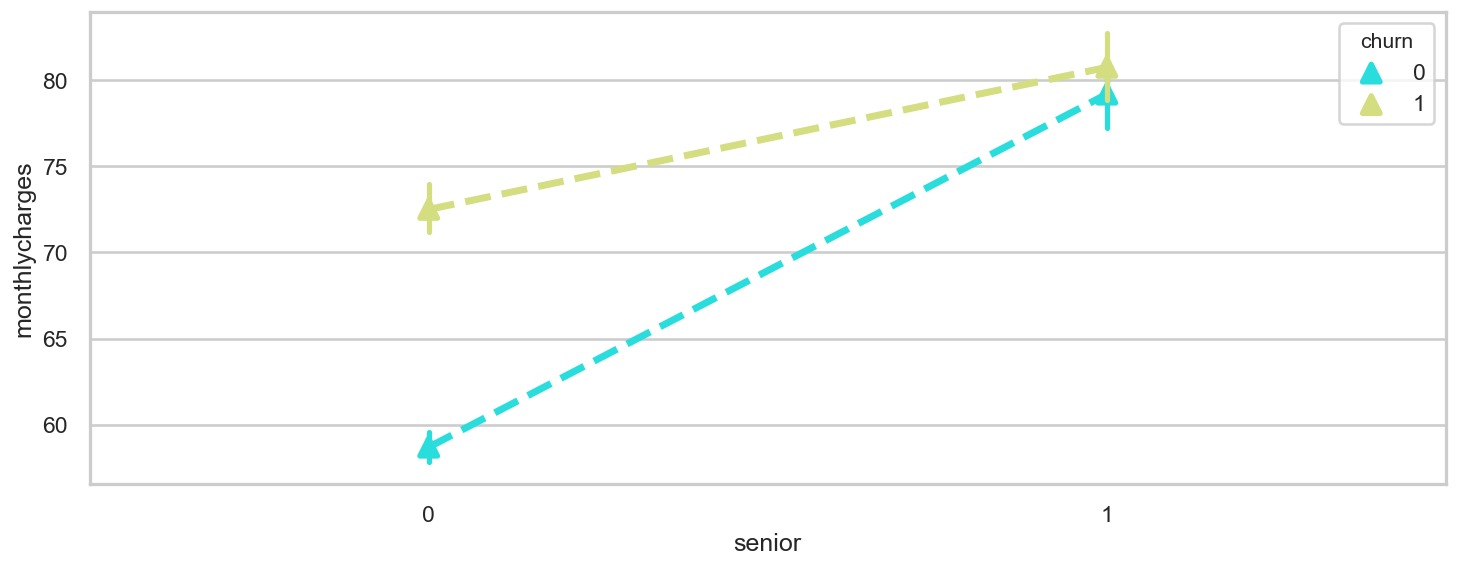

In [48]:
plt.figure(figsize=(14,5),dpi=125)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.pointplot(x='senior',y='monthlycharges',hue='churn',data=cus,ci=95,markers='^',linestyles='--',join=True,scale=1,orient='v',palette='rainbow',errwidth='3')
plt.show()

                HIGHER MONTHLY RATE LEADS TO TERMINATION OF SERVICE FOR BOTH SENIOR AND YOUNGER PEOPLE

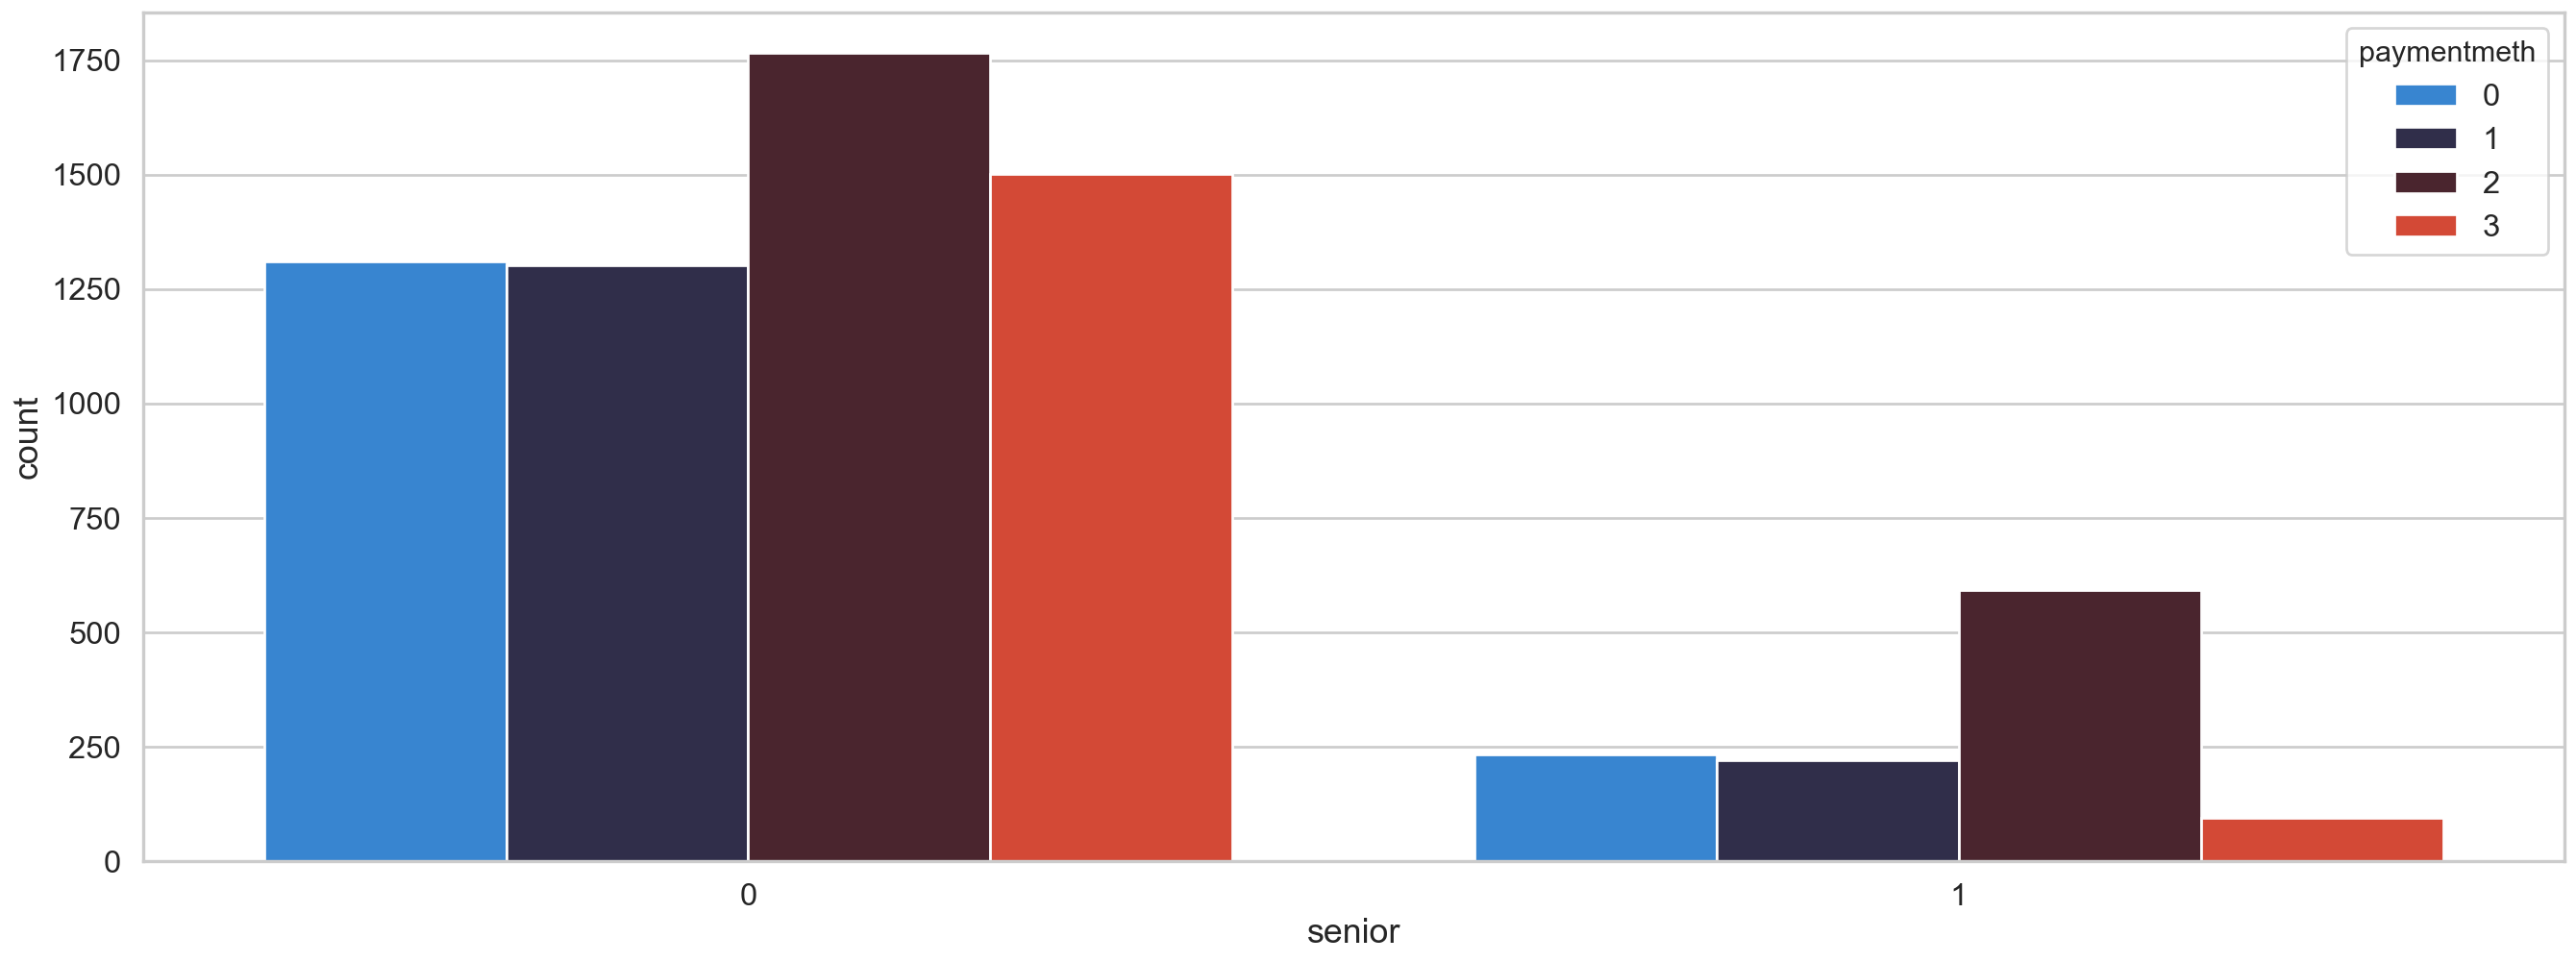

In [49]:
plt.figure(figsize=(25,9),dpi=130)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=1.1)
sns.countplot(x='senior',hue='paymentmeth',data=cus,orient='v',palette='icefire',saturation=25)
plt.show()

        FOR BOTH THE SENIOR CITIZEN AND YOUNGER PEOPLE THE HIGHLY ADOPTED METHOD OF PAYMENT IS BY ELECTRONIC CHEQUE

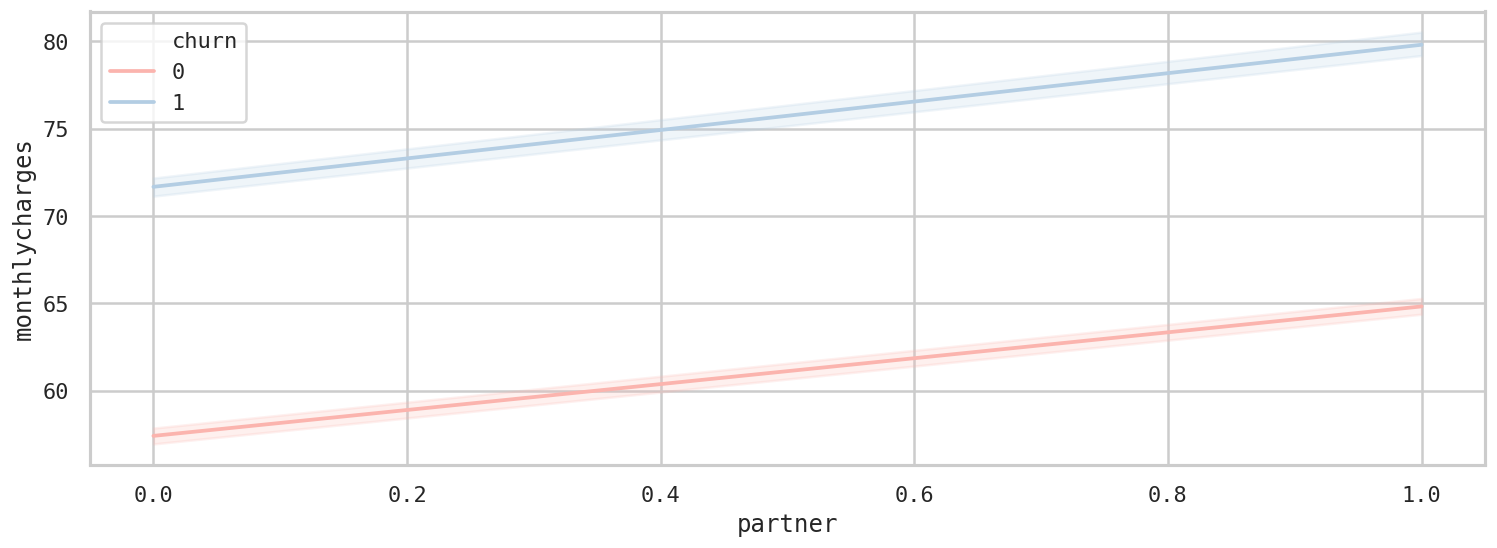

In [50]:
plt.figure(figsize=(15,5),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.8)
sns.lineplot(x='partner',y='monthlycharges',hue='churn',data=cus,palette='Pastel1',dashes=True,markers='2',estimator='mean',ci=55,err_style='band')
plt.show()

                        EVEN IN PARTNERSHIP A HIGHER MONTHLY CHARGE LEADS TO LOSSING OF CUSTOMERS

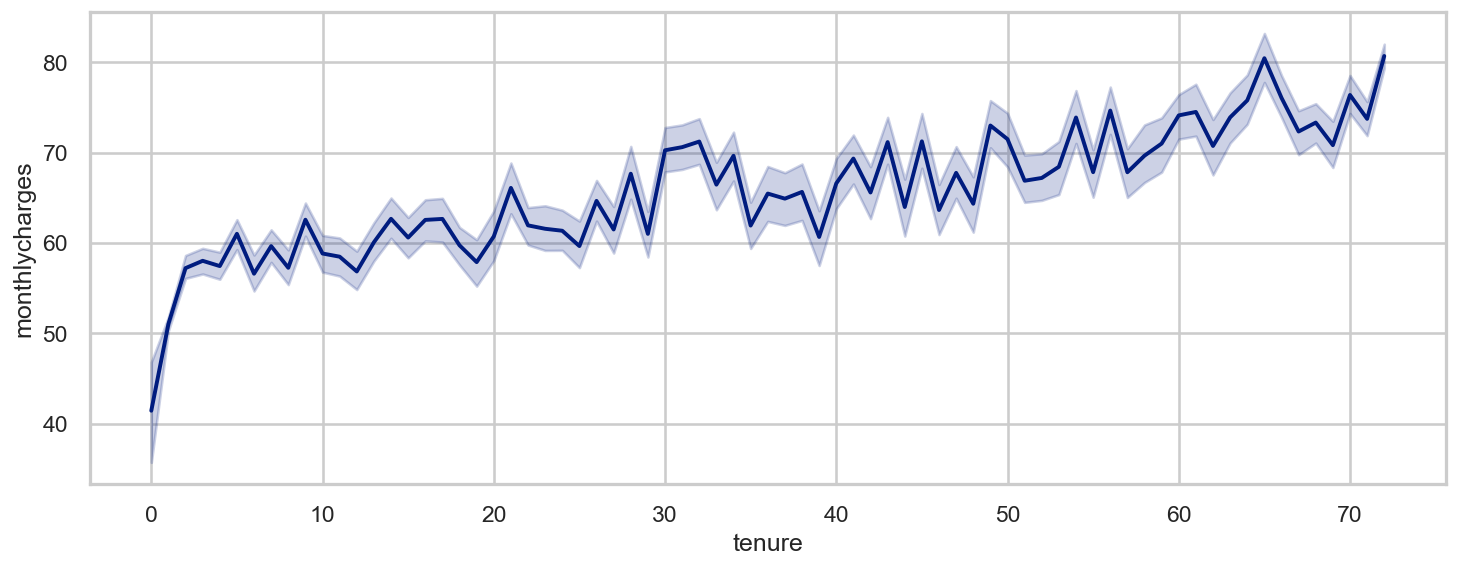

In [51]:
plt.figure(figsize=(14,5),dpi=125)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.lineplot(x='tenure',y='monthlycharges',data=cus,palette='Pastel1',dashes=True,markers='2',estimator='mean',ci=55,err_style='band')
plt.show()

                        A HIGHER MONTHLY TENURE LEADS TO HIGH RATE OF MONTHLY CHARGE

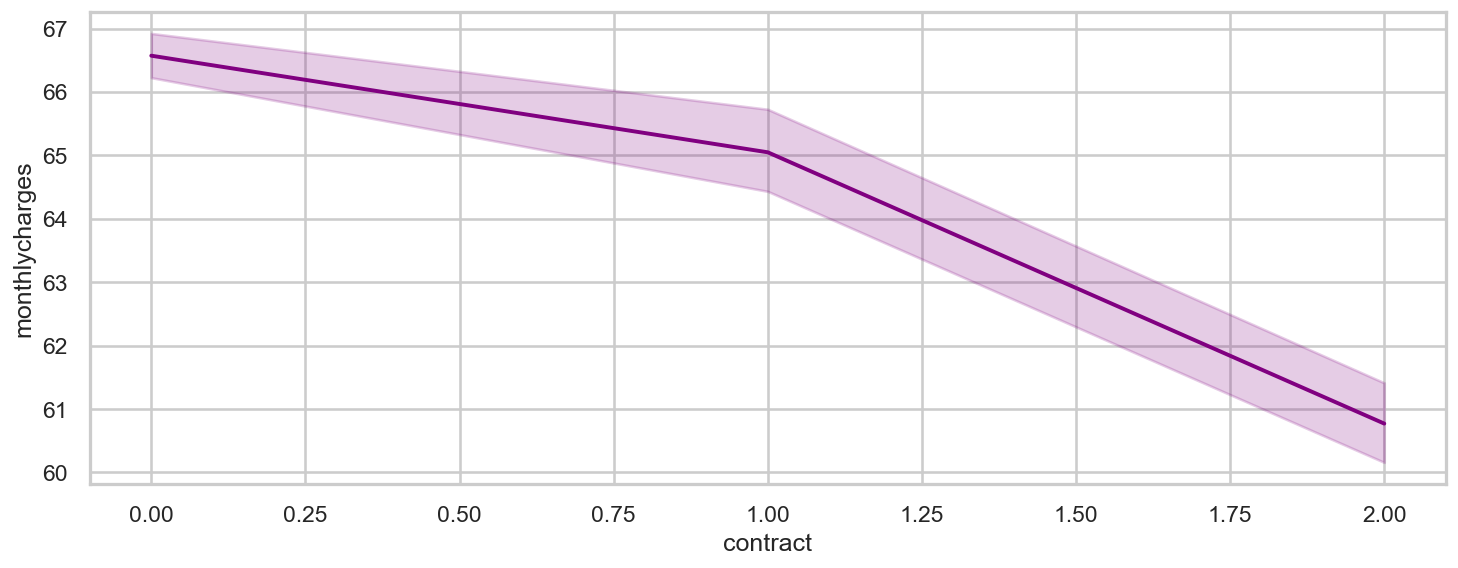

In [52]:
plt.figure(figsize=(14,5),dpi=125)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.lineplot(x='contract',y='monthlycharges',data=cus,color='purple',dashes=True,markers='2',ci=55,err_style='band')
plt.show()

                            THE MONTHLY CHARGE IS LOW FOR  A CONTRACT OF 2 YEAR

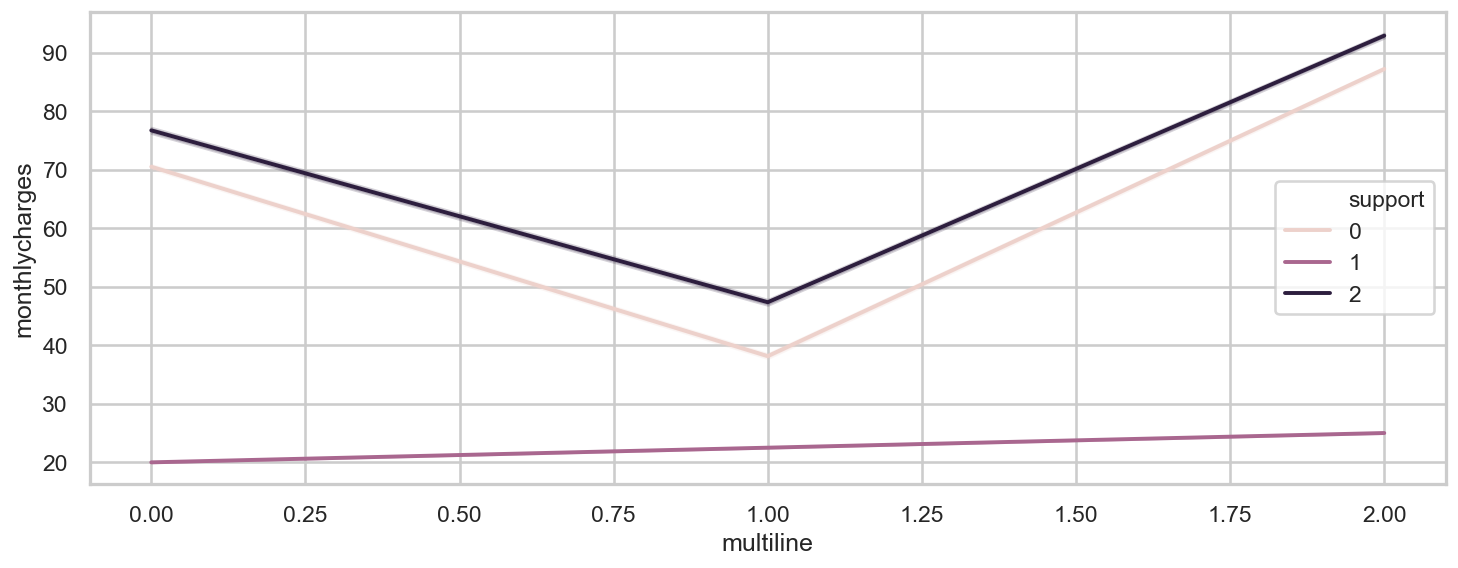

In [53]:
plt.figure(figsize=(14,5),dpi=125)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.lineplot(x='multiline',y='monthlycharges',hue='support',data=cus,color='purple',dashes=True,markers='2',ci=55,err_style='band')
plt.show()

                            WHEN A PERSON HAVE MULTILINE CONNECTION & HAVE TECH SUPPORT THE CHARGES ARE HIGH

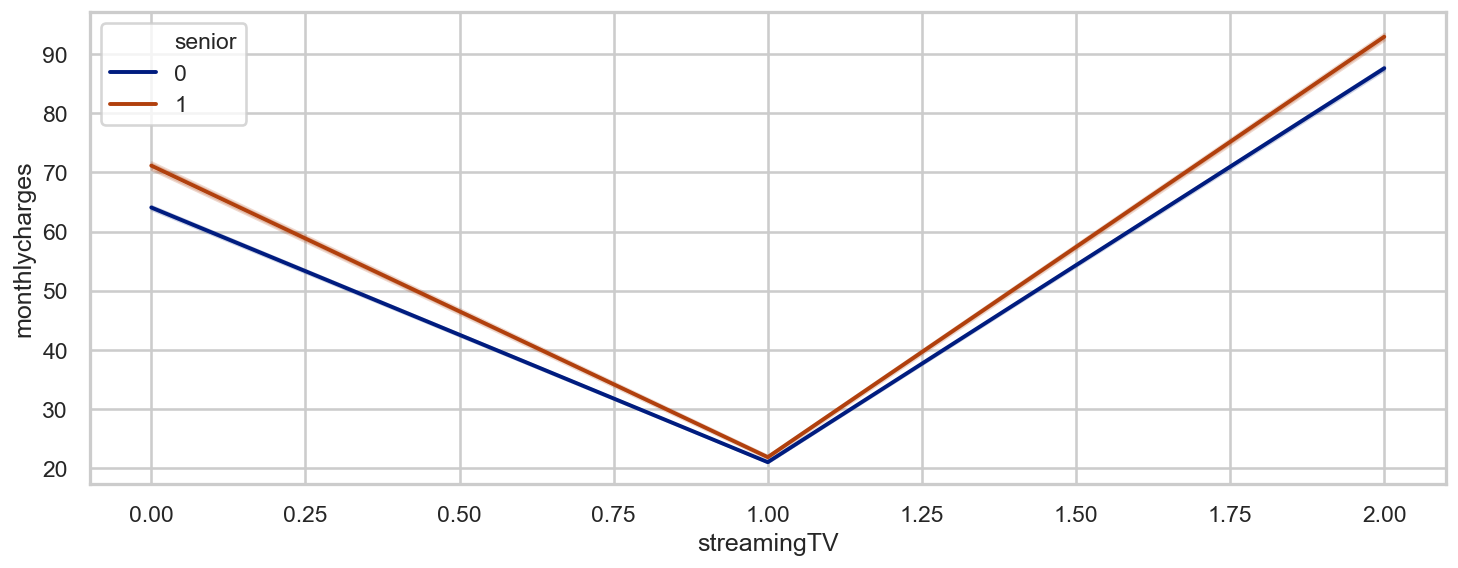

In [54]:
plt.figure(figsize=(14,5),dpi=125)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.lineplot(x='streamingTV',y='monthlycharges',hue='senior',data=cus,color='purple',dashes=True,markers='2',ci=55,err_style='band')
plt.show()

                                MONTHLY CHARGES FOR STREAMING TV FOR SENIOR CITIZEN IS HIGH

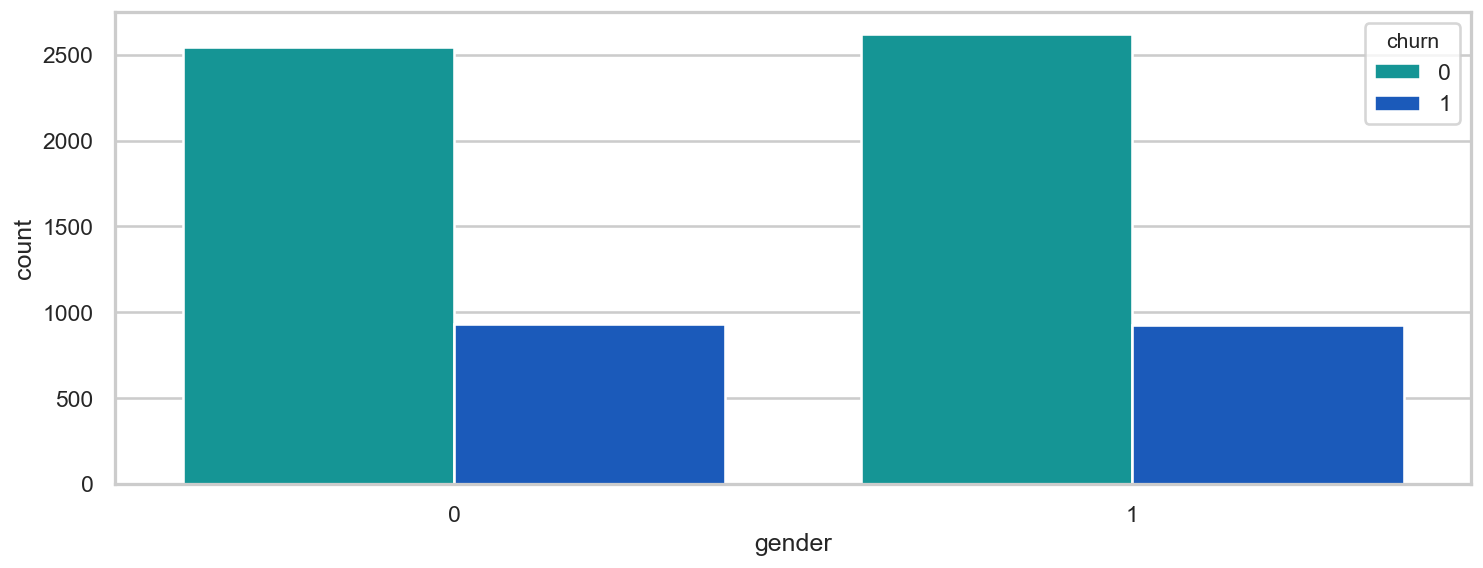

In [55]:
plt.figure(figsize=(14,5),dpi=125)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.countplot(x='gender',hue='churn',data=cus,palette='winter_r')
plt.show()

                                            CHURNING IN CASE OF FEMALE IS HIGH

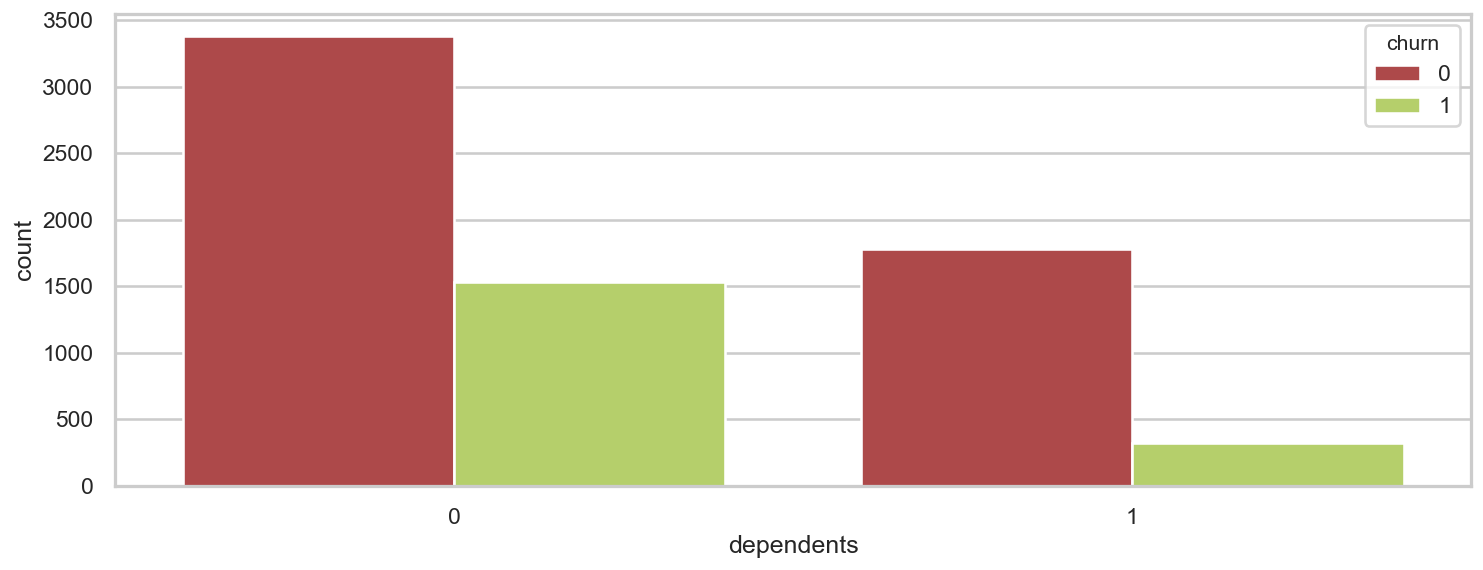

In [56]:
plt.figure(figsize=(14,5),dpi=125)
sns.set(context='talk',style='whitegrid',palette='dark',font_scale=0.8)
sns.countplot(x='dependents',hue='churn',data=cus,palette='tab20b_r',saturation=25)
plt.show()

                                    CHURNING IS HIGH INCASE OF PEOPLE WITHOUT ANY DEPENDENTS

*PLOTTING BOXPLOT TO VISUYALIZE THE OUTLIERS*

In [57]:
c=cus.columns.values
c

array(['gender', 'senior', 'partner', 'dependents', 'tenure', 'phone',
       'multiline', 'internet', 'online security', 'backup', 'protection',
       'support', 'streamingTV', 'streamingmovies', 'contract',
       'paperlessbill', 'paymentmeth', 'monthlycharges', 'totalcharges',
       'churn'], dtype=object)

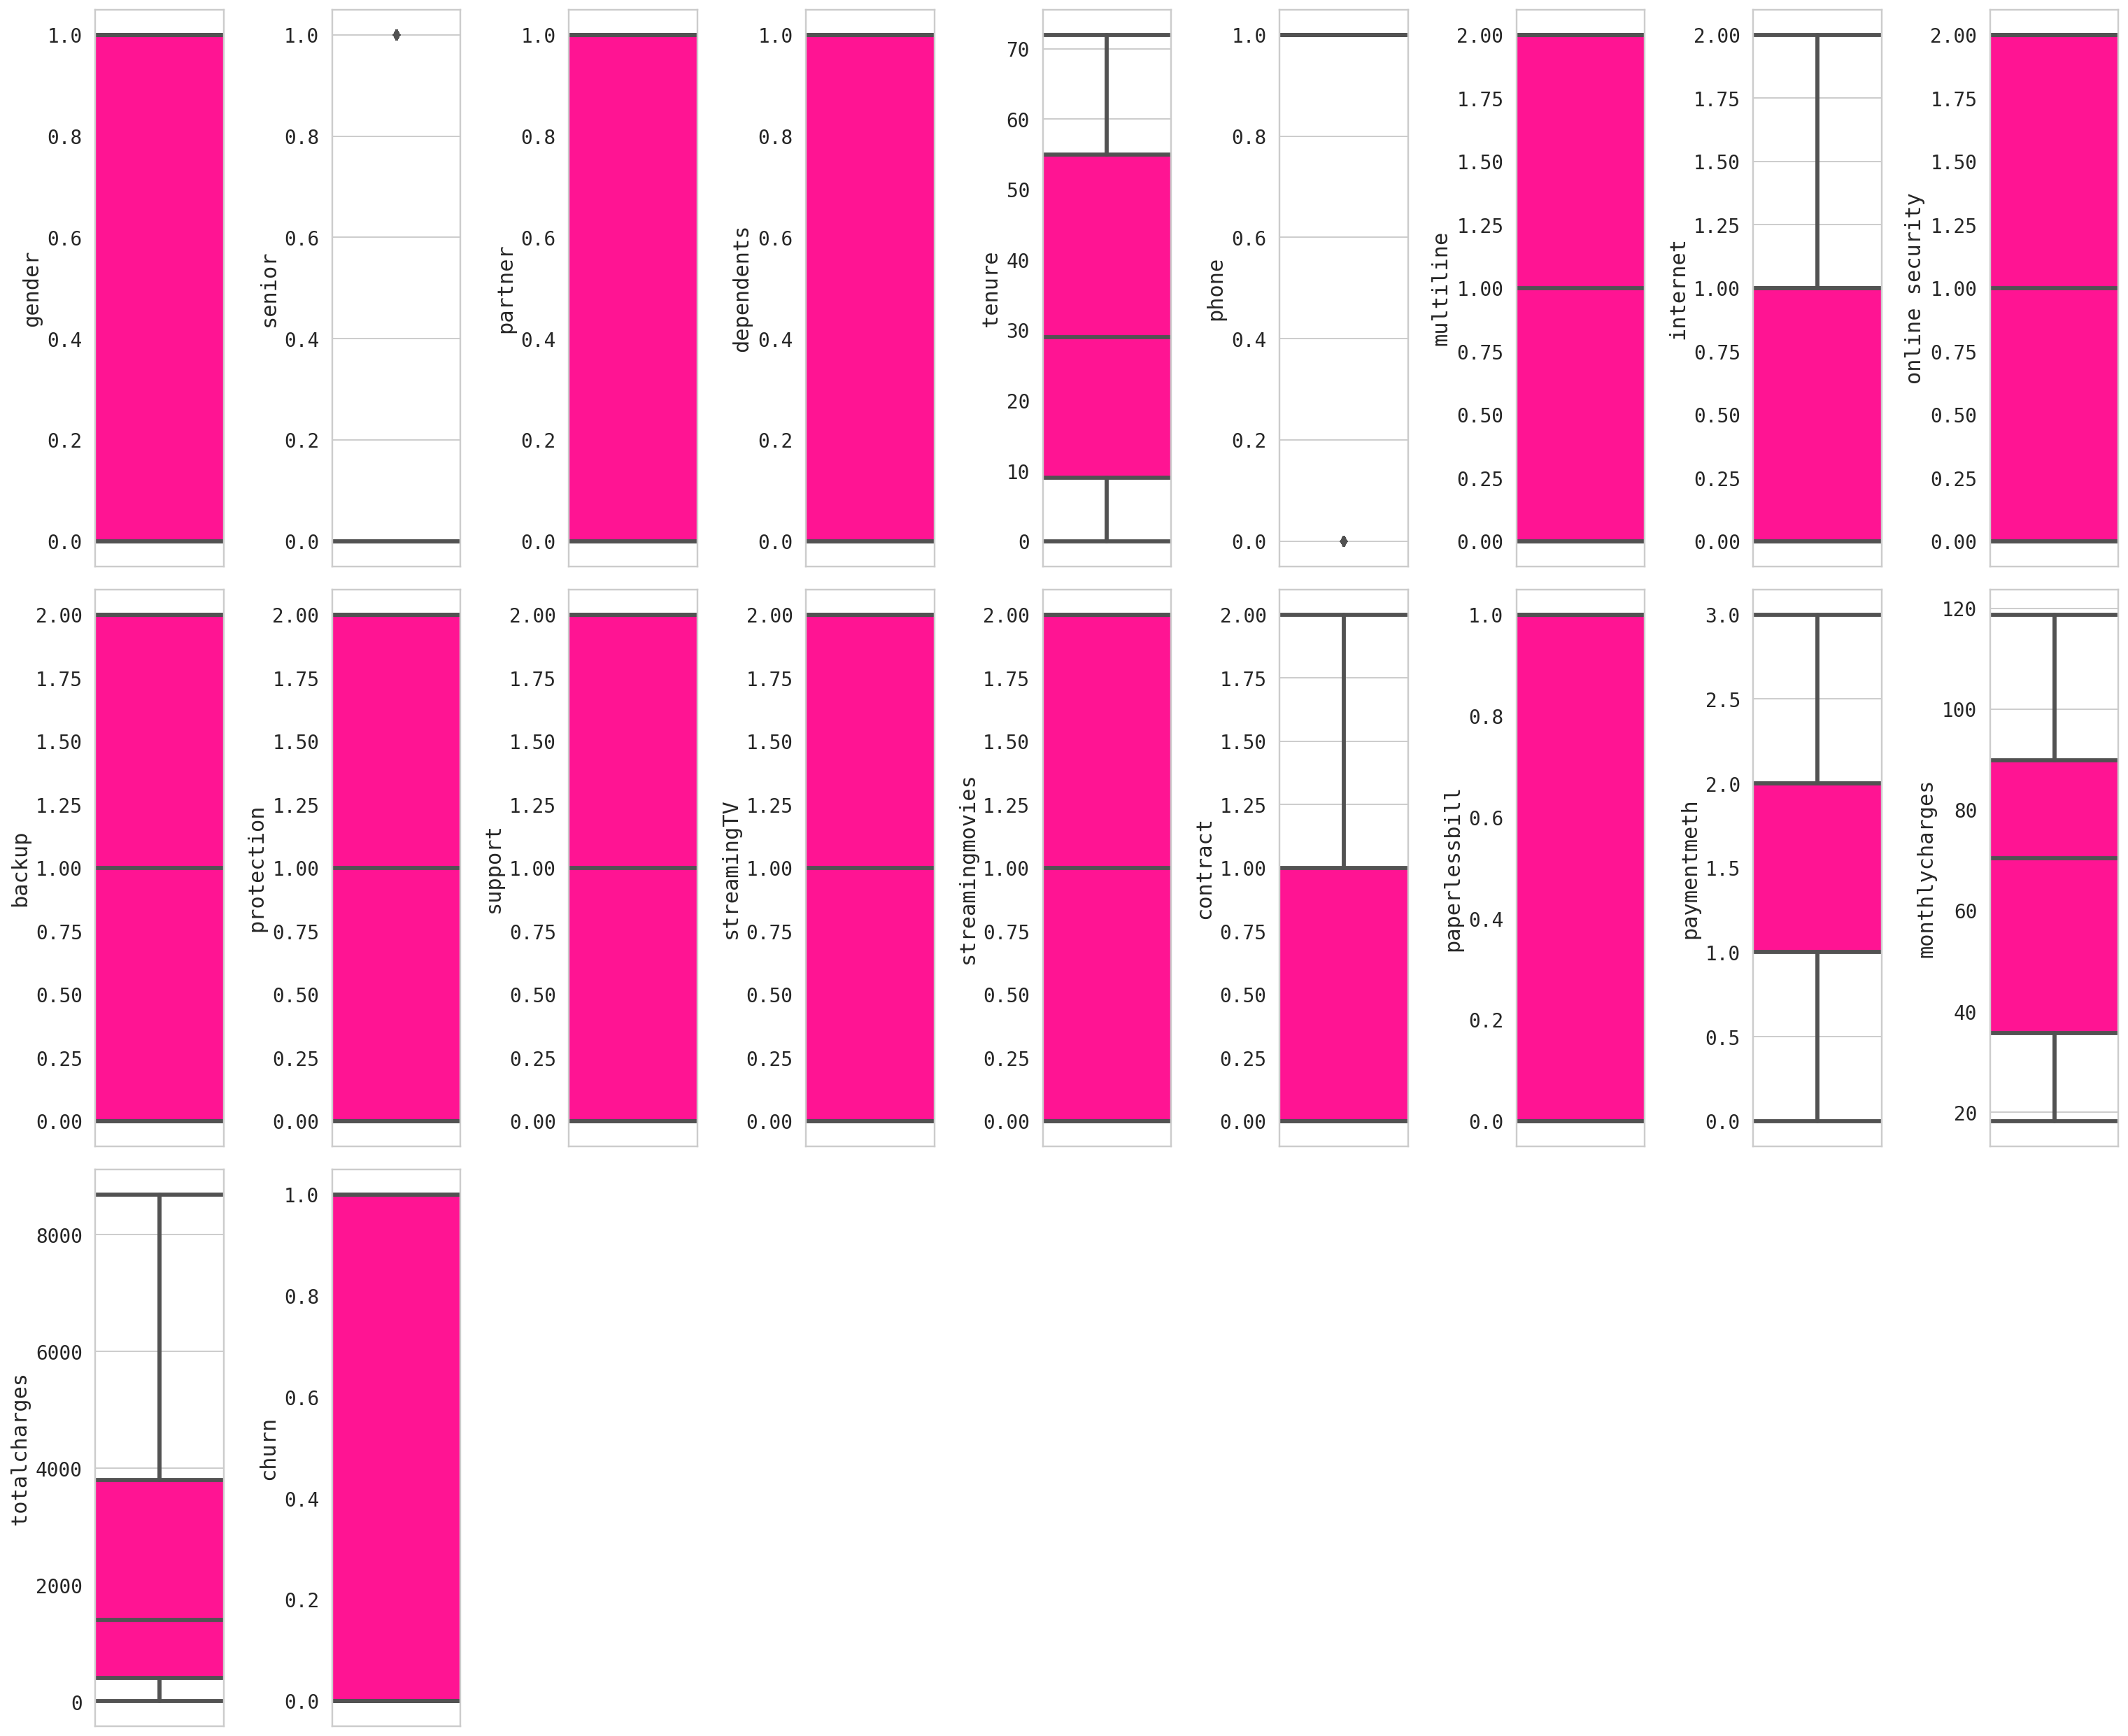

In [58]:
plt.figure(figsize=(22,18),dpi=140)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range (0,len(c)):
    plt.subplot(3,9,i+1)
    sns.boxplot(cus[c[i]],orient='v',color='deeppink',saturation=5,width=2,linewidth=3)
plt.tight_layout()

In [59]:
zsc=np.abs(zscore(cus))
zsc

array([[1.00872629, 0.44050836, 1.03140002, ..., 1.16413536, 0.99806149,
        0.59967071],
       [0.9913492 , 0.44050836, 0.96955592, ..., 0.26281076, 0.17698149,
        0.59967071],
       [0.9913492 , 0.44050836, 0.96955592, ..., 0.36591432, 0.96349016,
        1.66758187],
       ...,
       [1.00872629, 0.44050836, 1.03140002, ..., 1.17245016, 0.85827501,
        0.59967071],
       [0.9913492 , 2.27010445, 1.03140002, ..., 0.31756245, 0.87586974,
        1.66758187],
       [0.9913492 , 0.44050836, 0.96955592, ..., 1.35691277, 2.01076964,
        0.59967071]])

In [60]:
print(np.where(zsc>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  972, 1010, 1017, 1036, 1049, 1050, 1052,
       1071, 1109, 1118, 1121, 1143, 1145, 1149, 1160, 1168, 1181, 1203,
       1220, 1224, 1241, 1254, 1256, 1270, 1277, 1297, 1310, 1325, 1330,
       1332, 1333, 1338, 1347, 1350, 1363, 1377, 1400, 1405, 1414, 1450,
       1477, 1478, 1479, 1497, 1503, 1510, 1516, 1557, 1559, 1578, 1581,
       1611, 1617, 1631, 1634, 1649, 1686, 1689, 1

**we'll not remove the outliers here as removing it, will entirely remove the 'NO' case of phone column clearly it is not acceptable.**

*Plotting Distplot to visualize the spread*

In [61]:
plt.figure(figsize=(40,55),dpi=180)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range (0,len(c)):
    plt.subplot(5,4,i+1)
    sns.distplot(cus[c[i]],color='deepskyblue',kde=True,rug=True,bins=40)
    plt.tight_layout()

In [62]:
#checking for skew()
cus.skew()

gender            -0.017381
senior             1.829987
partner            0.061857
dependents         0.870322
tenure             0.235542
phone             -2.721300
multiline          0.112816
internet           0.208589
online security    0.416182
backup             0.181338
protection         0.185268
support            0.401511
streamingTV        0.026366
streamingmovies    0.012488
contract           0.626004
paperlessbill     -0.377214
paymentmeth       -0.166267
monthlycharges    -0.224097
totalcharges       0.959088
churn              1.068139
dtype: float64

In [63]:
#removing skew
#a skewness value above +0.55 is termed as positive skew a.k.a right skew/left_tailed skew 
# a skewness value below -0.55 is termed as negative skew a.k.a left skew/right_tailed skew
#here we have only right skew so removing them
for i in cus.columns:
    if cus.skew().loc[i]>0.55:
        cus[i]=np.log1p(cus[i])
    elif cus.skew().loc[i]< -0.55:
         cus[i]=np.square(cus[i])
print(cus.skew())

gender            -0.017381
senior             1.829987
partner            0.061857
dependents         0.870322
tenure             0.235542
phone             -2.721300
multiline          0.112816
internet           0.208589
online security    0.416182
backup             0.181338
protection         0.185268
support            0.401511
streamingTV        0.026366
streamingmovies    0.012488
contract           0.429029
paperlessbill     -0.377214
paymentmeth       -0.166267
monthlycharges    -0.224097
totalcharges      -0.744835
churn              1.068139
dtype: float64


<Figure size 1440x360 with 0 Axes>

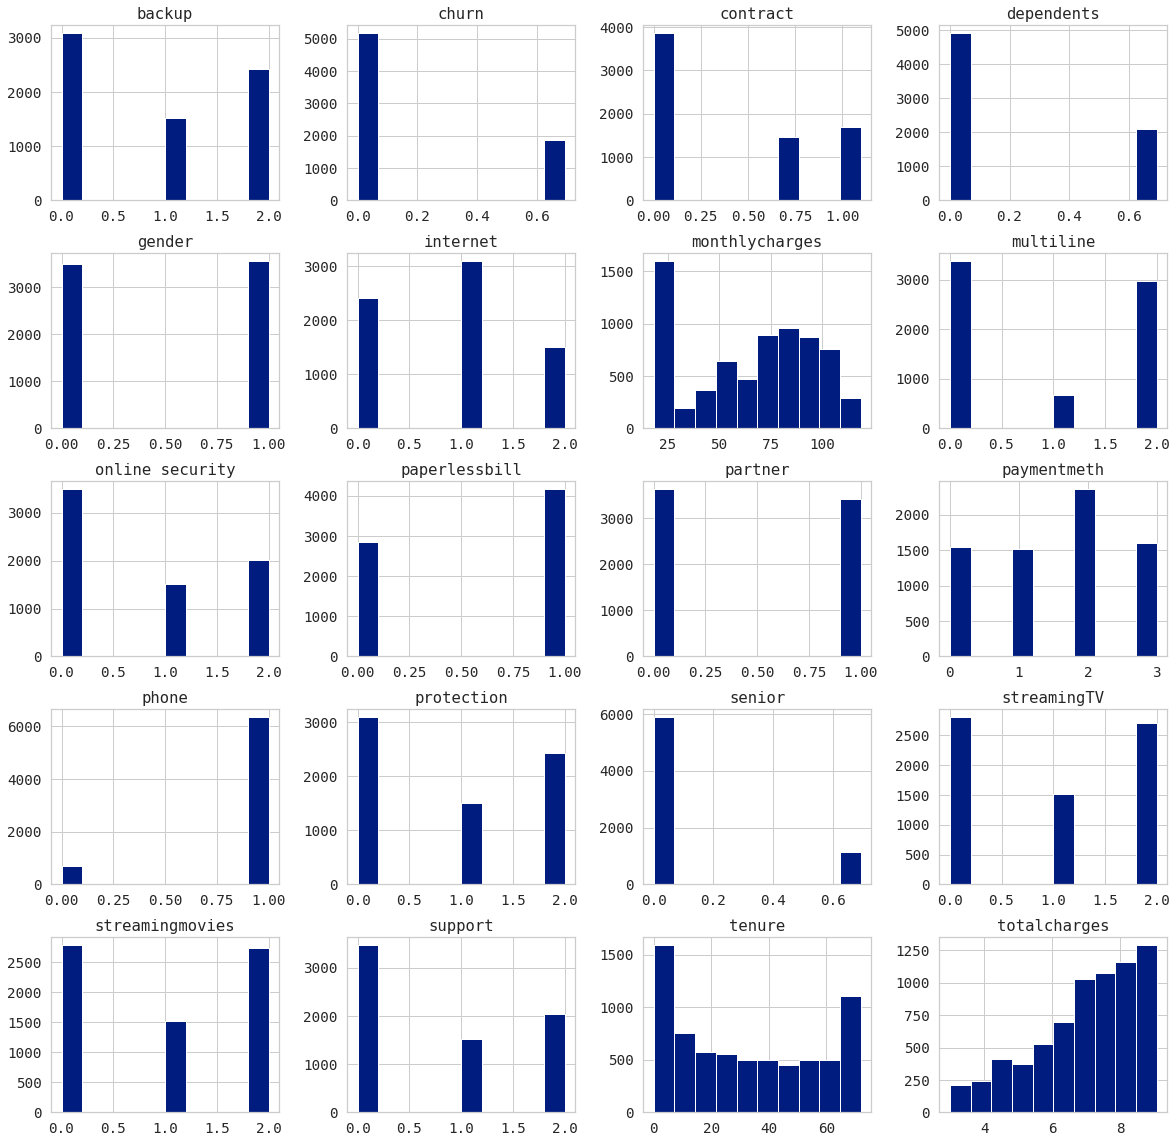

In [64]:
sns.set_context('talk',font_scale=1.9)
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.figure(figsize=(12,3),dpi=120)
cus.hist(figsize=(20,20),grid=True)
plt.show()

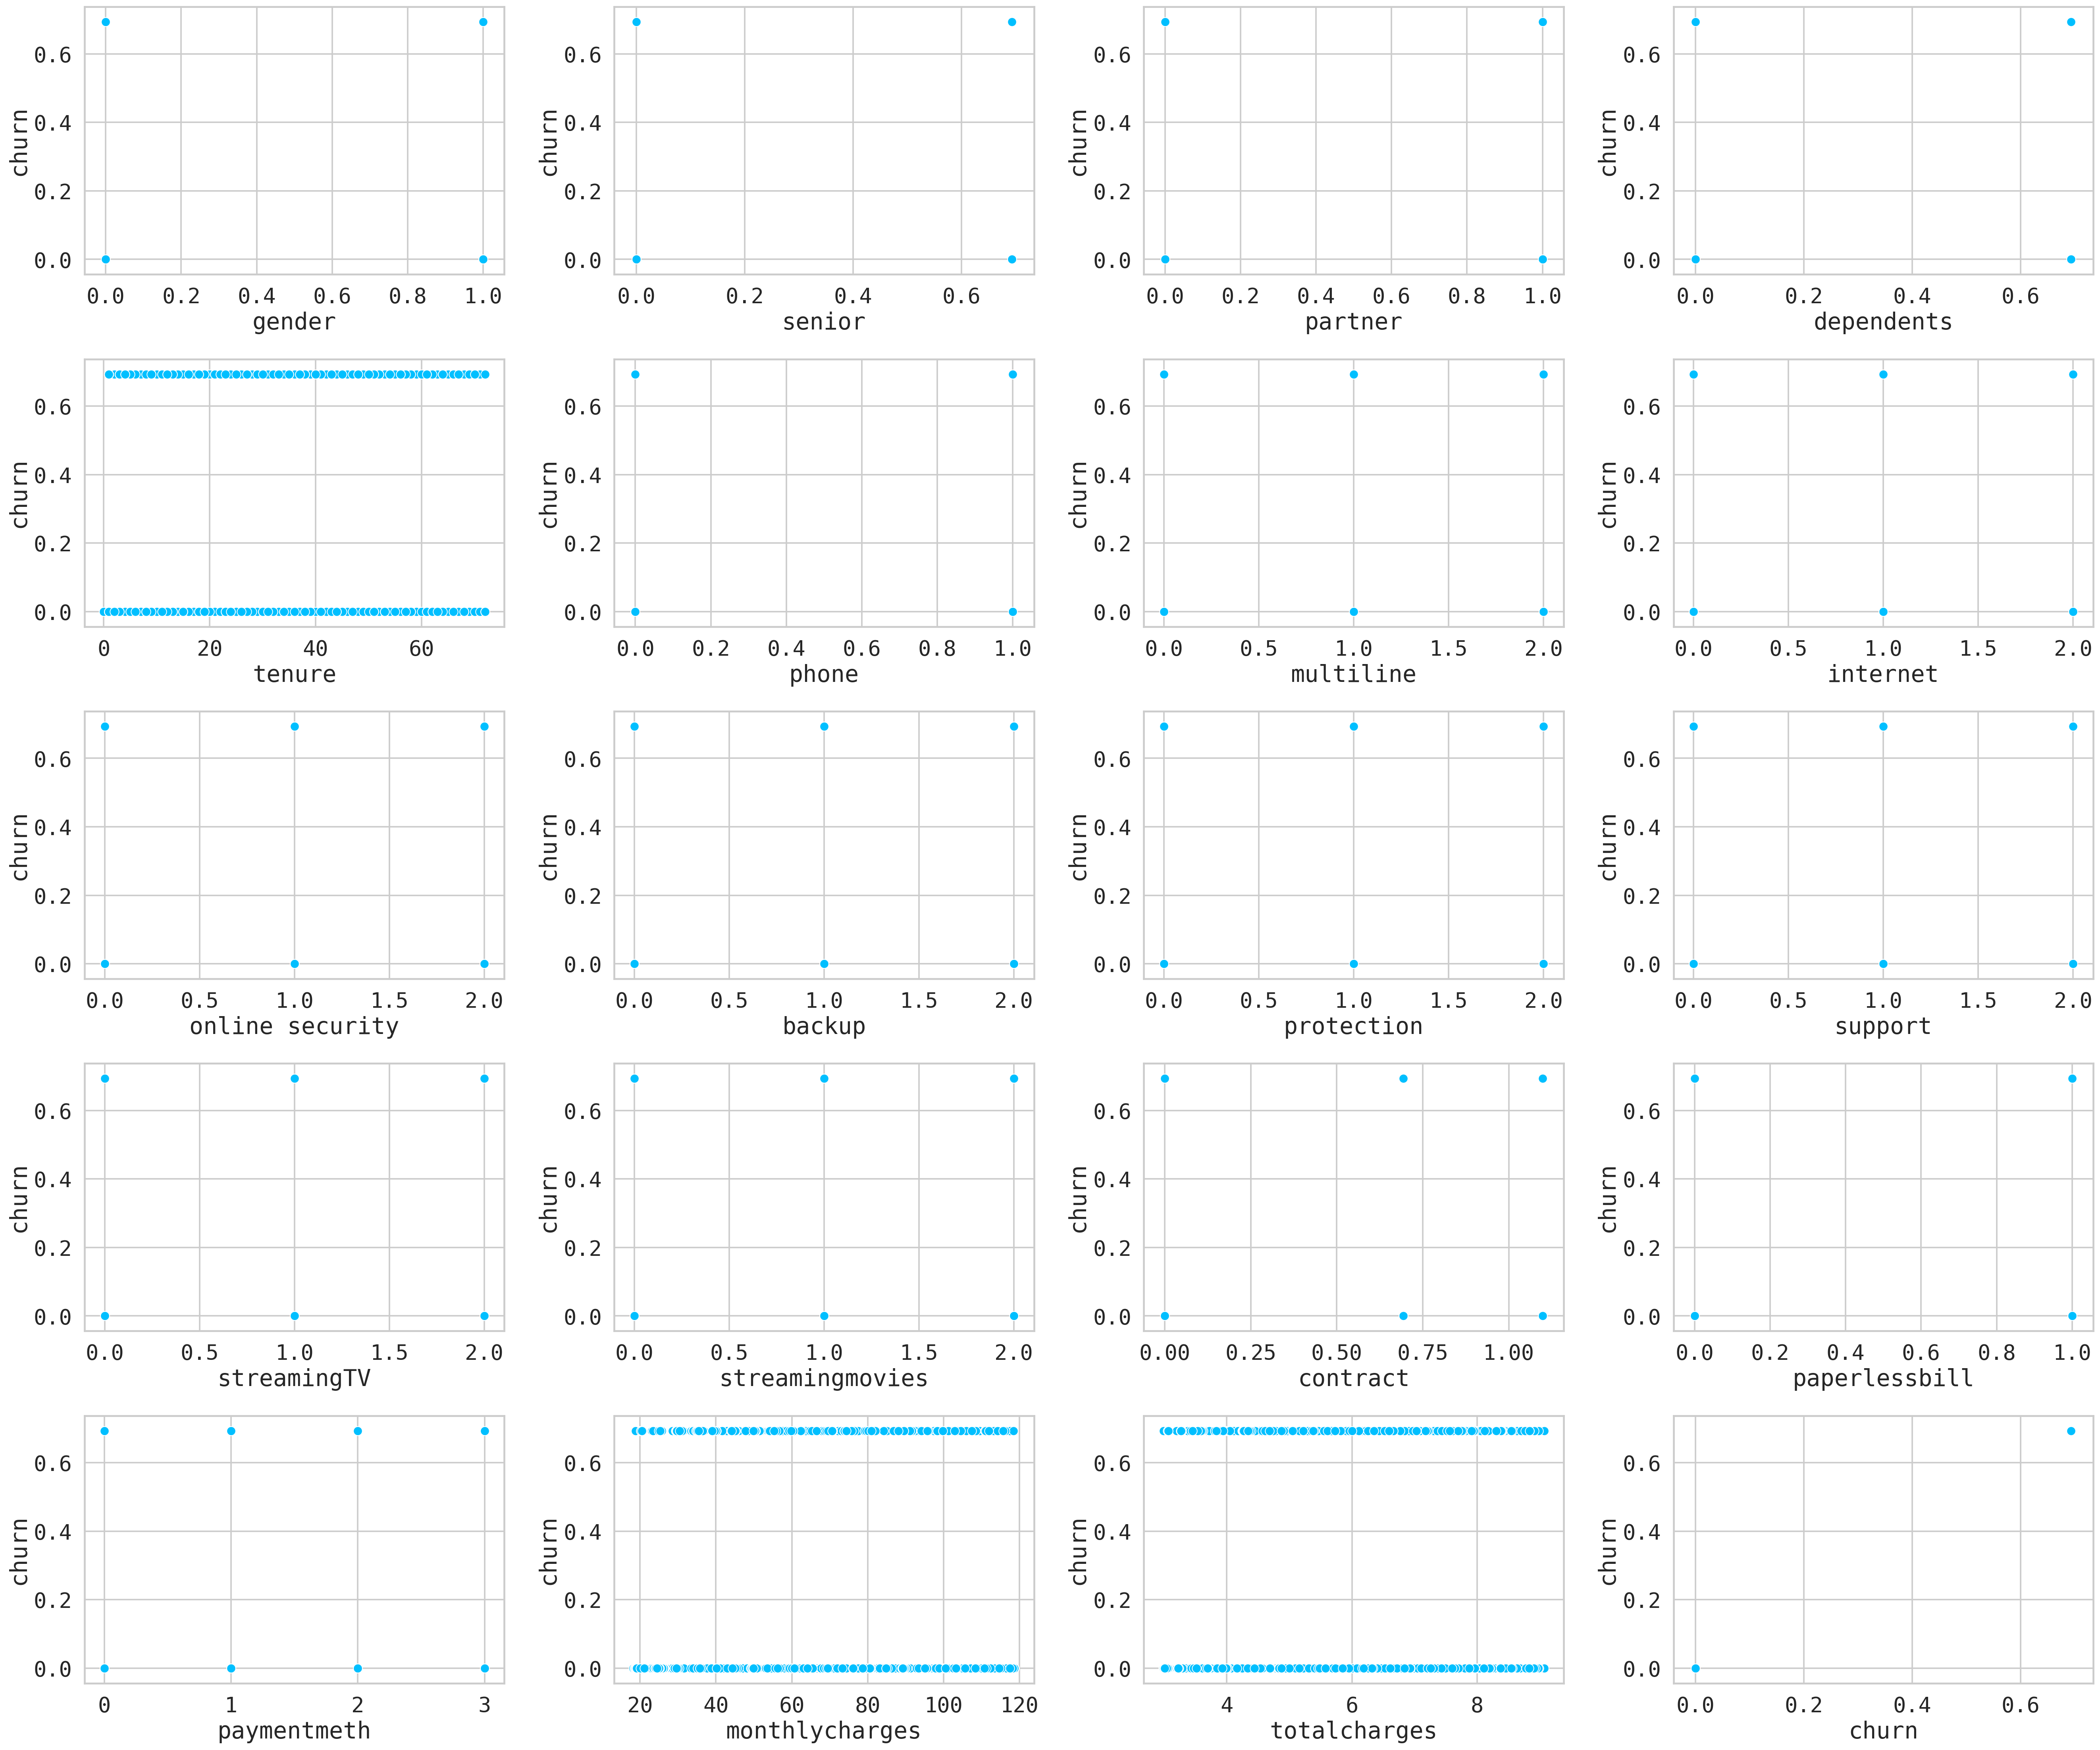

In [65]:
plt.figure(figsize=(30,25),dpi=180)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
for i in range (0,len(c)):
    plt.subplot(5,4,i+1)
    sns.scatterplot(x=cus[c[i]],y=cus['churn'],color='deepskyblue')
plt.tight_layout()

In [66]:
cus_corr=cus.corr()
cus_corr

gender    senior   partner  dependents    tenure     phone  \
gender           1.000000 -0.001125 -0.001014    0.011081  0.006185 -0.006769   
senior          -0.001125  1.000000  0.015553   -0.212115  0.015349  0.008909   
partner         -0.001014  0.015553  1.000000    0.451659  0.377346  0.018728   
dependents       0.011081 -0.212115  0.451659    1.000000  0.157603 -0.001092   
tenure           0.006185  0.015349  0.377346    0.157603  1.000000  0.009786   
phone           -0.006769  0.008909  0.018728   -0.001092  0.009786  1.000000   
multiline       -0.005939  0.145521  0.139827   -0.027083  0.340458 -0.019554   
internet        -0.001762 -0.031221  0.003667    0.046608 -0.026847  0.387549   
online security -0.015262 -0.128267  0.150589    0.151984  0.325762 -0.015026   
backup          -0.012182 -0.013675  0.152518    0.090502  0.370824  0.024439   
protection       0.000449 -0.021448  0.165752    0.080015  0.371062  0.004043   
support         -0.007045 -0.151349  0.126422    0.133303  0.323197 -0.018980   
streamingTV     -0.006461  0.030704  0.136443    0.046140  0.288737  0.055807   
streamingmovies -0.008781  0.047209  0.128635    0.020525  0.296225  0.044322   
contract         0.001835 -0.144980  0.294055    0.242774  0.674885  0.002725   
paperlessbill   -0.011350  0.156196 -0.015776   -0.112220  0.005053  0.016824   
paymentmeth      0.016304 -0.037320 -0.152069   -0.038185 -0.367827 -0.005304   
monthlycharges  -0.013158  0.219434  0.094301   -0.116191  0.245251  0.248984   
totalcharges    -0.003978  0.098886  0.335571    0.091743  0.831480  0.075613   
churn           -0.008763  0.151619 -0.149135   -0.163459 -0.351508  0.011323   

                 multiline  internet  online security    backup  protection  \
gender           -0.005939 -0.001762        -0.015262 -0.012182    0.000449   
senior            0.145521 -0.031221        -0.128267 -0.013675   -0.021448   
partner           0.139827  0.003667         0.150589  0.152518    0.165752   
dependents       -0.027083  0.046608         0.151984  0.090502    0.080015   
tenure            0.340458 -0.026847         0.325762  0.370824    0.371062   
phone            -0.019554  0.387549        -0.015026  0.024439    0.004043   
multiline         1.000000 -0.106819         0.006599  0.116625    0.121633   
internet         -0.106819  1.000000        -0.029421  0.035736    0.044563   
online security   0.006599 -0.029421         1.000000  0.184211    0.175061   
backup            0.116625  0.035736         0.184211  1.000000    0.186760   
protection        0.121633  0.044563         0.175061  0.186760    1.000000   
support           0.010909 -0.027019         0.284255  0.194841    0.239738   
streamingTV       0.174225  0.107508         0.043553  0.146071    0.275710   
streamingmovies   0.180113  0.098435         0.054847  0.135587    0.287869   
contract          0.104613  0.098362         0.378252  0.285332    0.355112   
paperlessbill     0.164814 -0.137056        -0.157024 -0.012565   -0.037485   
paymentmeth      -0.174073  0.082669        -0.096968 -0.124724   -0.135664   
monthlycharges    0.432246 -0.320525        -0.053347  0.120391    0.164399   
totalcharges      0.433968 -0.199001         0.223631  0.311784    0.332566   
churn             0.040175 -0.047366        -0.288505 -0.194214   -0.176770   

                  support  streamingTV  streamingmovies  contract  \
gender          -0.007045    -0.006461        -0.008781  0.001835   
senior          -0.151349     0.030704         0.047209 -0.144980   
partner          0.126422     0.136443         0.128635  0.294055   
dependents       0.133303     0.046140         0.020525  0.242774   
tenure           0.323197     0.288737         0.296225  0.674885   
phone           -0.018980     0.055807         0.044322  0.002725   
multiline        0.010909     0.174225         0.180113  0.104613   
internet        -0.027019     0.107508         0.098435  0.098362   
online security  0.284255     0.0435

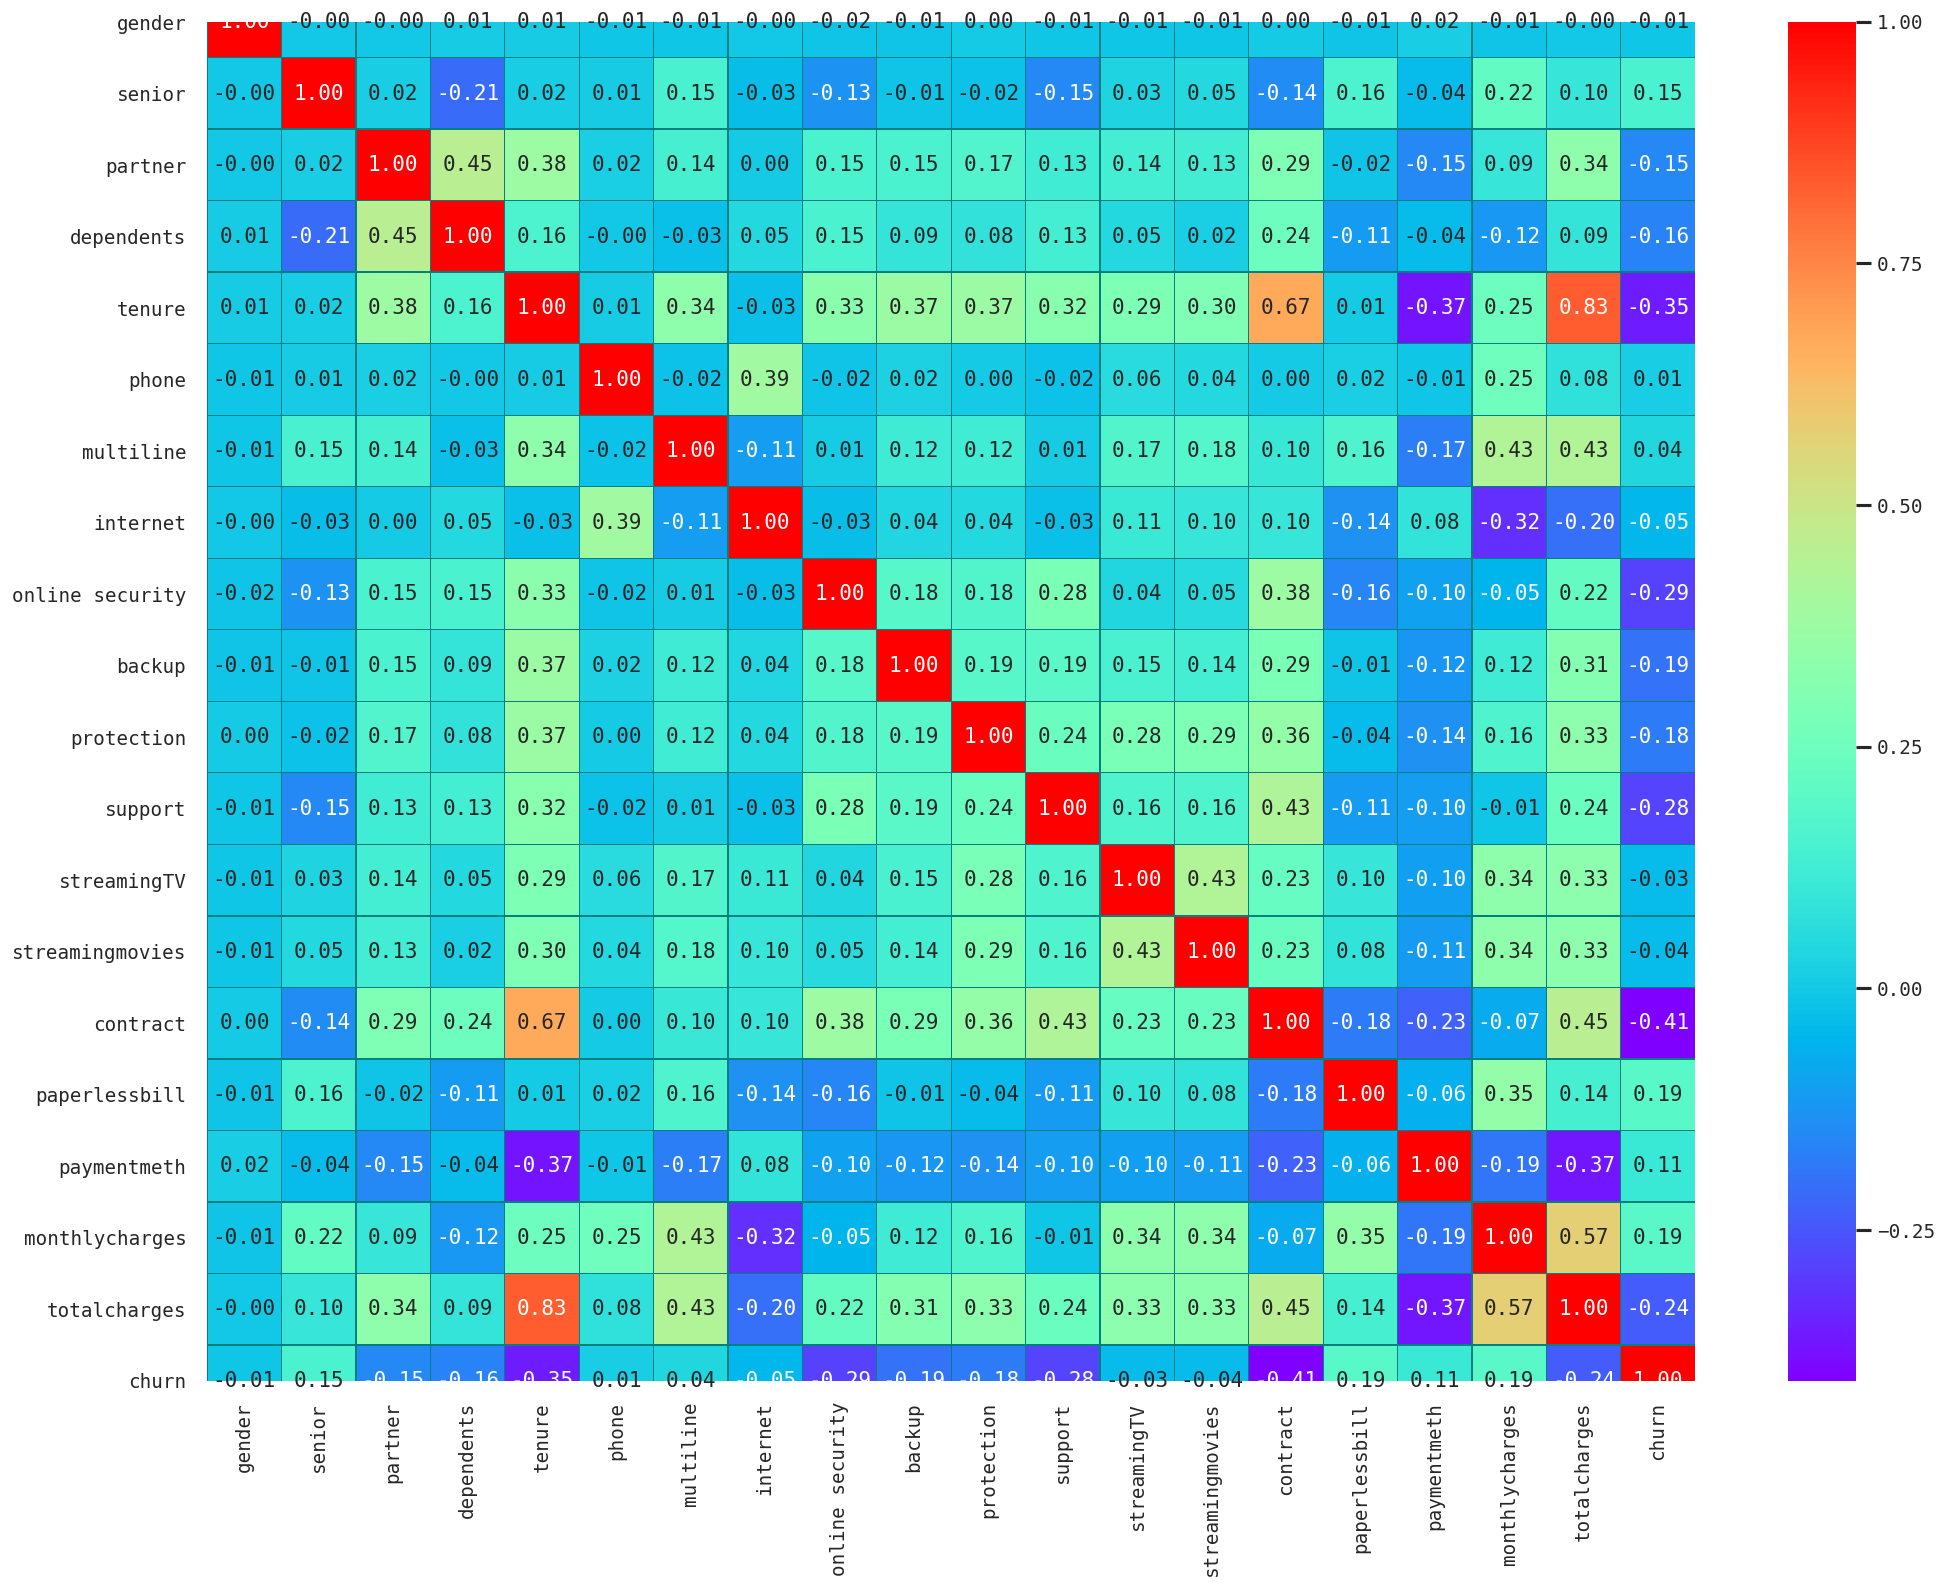

In [72]:
plt.figure(dpi=120,figsize=(20,15))
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.7)
sns.heatmap(cus_corr,annot=True,fmt='.2f',cmap='rainbow',linewidth=0.2,linecolor='teal')

*Here the output i.e. **CHURN** is generating binary output so its a classification based problem and we can use the following algoithms for modelling and the highest performing algo to generate our final model*;


In [73]:
#IMPORTING IMPORTANT LIBRARIES FOR MODEL GENERATION
from sklearn.preprocessing import StandardScaler #FOR STANDARD SCALING OF INPUTS
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score as cvs ,RandomizedSearchCV as rsv
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve,roc_auc_score,auc

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [74]:
cus.head(4)

gender  senior  partner  dependents  tenure  phone  multiline  internet  \
0       0     0.0        1         0.0       1      0          1         0   
1       1     0.0        0         0.0      34      1          0         0   
2       1     0.0        0         0.0       2      1          0         0   
3       1     0.0        0         0.0      45      0          1         0   

   online security  backup  protection  support  streamingTV  streamingmovies  \
0                0       2           0        0            0                0   
1                2       0           2        0            0                0   
2                2       2           0        0            0                0   
3                2       0           2        2            0                0   

   contract  paperlessbill  paymentmeth  monthlycharges  totalcharges  \
0  0.000000              1            2           29.85      3.429137   
1  0.693147              0            3           56.95      7.544597   
2  0.000000              1            3           53.85      4.692723   
3  0.693147              0            0           42.30      7.518471   

      churn  
0  0.000000  
1  0.000000  
2  0.693147  
3  0.000000

In [75]:
#checking for any null values before preocessing
cus.isnull().sum()

gender             0
senior             0
partner            0
dependents         0
tenure             0
phone              0
multiline          0
internet           0
online security    0
backup             0
protection         0
support            0
streamingTV        0
streamingmovies    0
contract           0
paperlessbill      0
paymentmeth        0
monthlycharges     0
totalcharges       0
churn              0
dtype: int64

*NO NULL VALUES*

*Spliting dataset into x and y for training and testing*

In [76]:
x=cus.drop(['churn'],axis=1)
y=cus['churn']
print('x:',"--"*30,"\n", x.head(7),'\nshape of x:', x.shape)
print('\ny:',"--"*30,"\n", y.head(7),'\nshape of y:', y.shape)

x: ------------------------------------------------------------ 
    gender  senior  partner  dependents  tenure  phone  multiline  internet  \
0       0     0.0        1    0.000000       1      0          1         0   
1       1     0.0        0    0.000000      34      1          0         0   
2       1     0.0        0    0.000000       2      1          0         0   
3       1     0.0        0    0.000000      45      0          1         0   
4       0     0.0        0    0.000000       2      1          0         1   
5       0     0.0        0    0.000000       8      1          2         1   
6       1     0.0        0    0.693147      22      1          2         1   

   online security  backup  protection  support  streamingTV  streamingmovies  \
0                0       2           0        0            0                0   
1                2       0           2        0            0                0   
2                2       2           0        0            0      

In [77]:
y=round(y).astype('int64')
y.head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: churn, dtype: int64

*Using StandardScaler Feature to standardise the values of x*

In [78]:
ss=StandardScaler()
x=ss.fit_transform(x)
print(x)

[[-1.00872629 -0.44050836  1.03140002 ...  0.4021564  -1.16413536
  -2.29716226]
 [ 0.9913492  -0.44050836 -0.96955592 ...  1.33896466 -0.26281076
   0.38370372]
 [ 0.9913492  -0.44050836 -0.96955592 ...  1.33896466 -0.36591432
  -1.47404511]
 ...
 [-1.00872629 -0.44050836  1.03140002 ...  0.4021564  -1.17245016
  -0.71977496]
 [ 0.9913492   2.27010445  1.03140002 ...  1.33896466  0.31756245
  -0.7991305 ]
 [ 0.9913492  -0.44050836 -0.96955592 ... -1.47146012  1.35691277
   1.2219101 ]]


*converting y into  np.array format form pandas.core.series.Series form and reshaping it in the form of 1 columns and many rows*

In [79]:
y=np.array(y)
y=y.reshape(-1,1)
print(y.shape)

(7021, 1)


In [80]:
print('shape of x=', x.shape,'\nshape of y=', y.shape)

shape of x= (7021, 19) 
shape of y= (7021, 1)


*creating a function to achive the highest perfoming random st,accuracy score,tpr,fpr,auc score for all model to be used*

In [81]:
def acusr(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test)
        f1=f1_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        auc_scores=roc_auc_score(y_test,pred)
        tpr,fpr,threshold=roc_curve(y_test,pred)
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print("In this",model,'\n\nThe best suited random_score is: ', final_rst, '\n\nAccuracy score:', max_ac_score)
    print('\nF1 SCORE:', f1)
    print('\nCONFUSION MATRIX:\n',conf)
    print('\nAUC_ROC Score:\n',auc_scores)
    print('\nTPR:',tpr,'\nFPR:',fpr)

**LOGISTIC REGRESSION**

In [82]:
logi=LogisticRegression()
acusr(logi,x,y)

In this LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

The best suited random_score is:  93 

Accuracy score: 0.822620016273393

F1 SCORE: 0.5803722504230119

CONFUSION MATRIX:
 [[1619  181]
 [ 315  343]]

AUC_ROC Score:
 0.7103605200945627

TPR: [0.         0.10055556 1.        ] 
FPR: [0.        0.5212766 1.       ]


In [83]:
#using cross_val_score to check for over/under fitting of logistic regressor model
logi_accuracy=cvs(logi,x,y,scoring='accuracy',cv=50)
logi_roc_auc=cvs(logi,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT LOGISTIC MODEL IS=', logi_accuracy.mean())
print('THE AUC_ROC SCORE AT LOGISTIC MODEL IS=', logi_roc_auc.mean())

THE ACCURACY SCORE AT LOGISTIC MODEL IS= 0.8075788061703555
THE AUC_ROC SCORE AT LOGISTIC MODEL IS= 0.8484518100703589


**DECISION TREE CLASSIFIER**

In [84]:
#using RandomizedSearchCV to get best parameters for optimum performance of DTC model

dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10),'min_samples_split':range(2,8)}
dtc_rs=rsv(dtc,dtc_para,cv=70)
dtc_rs.fit(x,y)
print(dtc_rs,'\n')
print(dtc_rs.best_score_,'\n')
print(dtc_rs.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [85]:
dtc=DecisionTreeClassifier(splitter='random',min_samples_split=7,max_depth=7,criterion='gini')
acusr(dtc,x,y)

In this DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random') 

The best suited random_score is:  93 

Accuracy score: 0.8120423108218063

F1 SCORE: 0.5582486317435497

CONFUSION MATRIX:
 [[1536  264]
 [ 301  357]]

AUC_ROC Score:
 0.6979432624113473

TPR: [0.         0.14666667 1.        ] 
FPR: [0.         0.54255319 1.        ]


In [86]:
#using cross_val_score to check for over/under fitting of DTC model
dtc_accuracy=cvs(dtc,x,y,scoring='accuracy',cv=50)
dtc_roc_auc=cvs(dtc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT DTC MODEL IS=', dtc_accuracy.mean())
print('THE AUC_ROC SCORE AT DTC MODEL IS=',  dtc_roc_auc.mean())

THE ACCURACY SCORE AT DTC MODEL IS= 0.7883435792057308
THE AUC_ROC SCORE AT DTC MODEL IS= 0.8251753620193835


**SUPPORT VECTOR CLASSIFIER**

In [87]:
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svc_rsv=rsv(svc,svc_para,cv=70)
svc_rsv.fit(x,y)
print(svc_rsv)
print('\nbest score=', svc_rsv.best_score_)
print("\nbest parameters for SVC=\n",svc_rsv.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': [0.01, 0.1],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.8047286711294688

best parameters for SVC=
 {'kernel': 'linear', 'gamma': 0.01}


In [88]:
svc=SVC(kernel='linear',gamma=0.01,degree=8)
acusr(svc,x,y)

In this SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

The best suited random_score is:  83 

Accuracy score: 0.8185516680227828

F1 SCORE: 0.5691906005221933

CONFUSION MATRIX:
 [[1636  164]
 [ 331  327]]

AUC_ROC Score:
 0.7029246876055386

TPR: [0.         0.09111111 1.        ] 
FPR: [0.         0.49696049 1.        ]


In [89]:
#using cross_val_score to check for over/under fitting of SVC model
svc_accuracy=cvs(svc,x,y,scoring='accuracy',cv=50)
svc_roc_auc=cvs(svc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT SVC MODEL IS=', svc_accuracy.mean())
print('THE AUC_ROC SCORE AT SVC MODEL IS=',  svc_roc_auc.mean())

THE ACCURACY SCORE AT SVC MODEL IS= 0.8028746236282945
THE AUC_ROC SCORE AT SVC MODEL IS= 0.8447728129843612


**K_NEIGHBORS REGRESSOR**

In [90]:
#using KNeighborsClassifier algo with RandomizedSearchCV to get best parameters for optimum performance
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute']}
knc_rsv=rsv(knc,knc_para,cv=30)
knc_rsv.fit(x,y)
print(knc_rsv)
print('\nbest score=',knc_rsv.best_score_)
print('\nbest parameters for KNC=\n',knc_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': range(20, 65)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.7919099843327161

best parameters for KNC=
 {'n_neighbors': 57, 'algorithm': 'brute'}


In [91]:
knc=KNeighborsClassifier(n_neighbors=57,algorithm='brute')
acusr(knc,x,y)

In this KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=57, p=2,
                     weights='uniform') 

The best suited random_score is:  93 

Accuracy score: 0.8112286411716843

F1 SCORE: 0.5586776859504132

CONFUSION MATRIX:
 [[1586  214]
 [ 320  338]]

AUC_ROC Score:
 0.6973944613306314

TPR: [0.         0.11888889 1.        ] 
FPR: [0.         0.51367781 1.        ]


In [92]:
#using cross_val_score to check for over/under fitting of KNC model
knc_accuracy=cvs(knc,x,y,scoring='accuracy',cv=50)
knc_roc_auc=cvs(knc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT KNC MODEL IS=', knc_accuracy.mean())
print('THE AUC_ROC SCORE AT KNC MODEL IS=',  knc_roc_auc.mean())

THE ACCURACY SCORE AT KNC MODEL IS= 0.7930597628323128
THE AUC_ROC SCORE AT KNC MODEL IS= 0.8299686762004724


**GAUSSIAN NB**

In [93]:
gnb=GaussianNB()
acusr(gnb,x,y)

In this GaussianNB(priors=None, var_smoothing=1e-09) 

The best suited random_score is:  93 

Accuracy score: 0.7721724979658259

F1 SCORE: 0.6096605744125326

CONFUSION MATRIX:
 [[1393  407]
 [ 191  467]]

AUC_ROC Score:
 0.7418076663289428

TPR: [0.         0.22611111 1.        ] 
FPR: [0.         0.70972644 1.        ]


In [94]:
gnb_accuracy=cvs(gnb,x,y,scoring='accuracy',cv=50)
gnb_roc_auc=cvs(gnb,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT GNB MODEL IS=', gnb_accuracy.mean())
print('THE AUC_ROC SCORE AT GNB MODEL IS=',  gnb_roc_auc.mean())

THE ACCURACY SCORE AT GNB MODEL IS= 0.7587340211481657
THE AUC_ROC SCORE AT GNB MODEL IS= 0.8286998083536151


**RANDOM FOREST CLASSIFIER**

In [95]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[200,300,350],'max_depth':[6,9],'criterion':('gini','entropy')}
rfc_rsv=rsv(rfc,rfc_para,cv=70)
rfc_rsv.fit(x,y)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [96]:
rfc=RandomForestClassifier(n_estimators=350,max_depth=9,criterion='entropy')
acusr(rfc,x,y)

In this RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

The best suited random_score is:  135 

Accuracy score: 0.8181448331977217

F1 SCORE: 0.561038961038961

CONFUSION MATRIX:
 [[1627  173]
 [ 334  324]]

AUC_ROC Score:
 0.69814505234718

TPR: [0.         0.09611111 1.        ] 
FPR: [0.         0.49240122 1.        ]


In [97]:
rfc_accuracy=cvs(rfc,x,y,scoring='accuracy',cv=50)
rfc_roc_auc=cvs(rfc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT RFC MODEL IS=', rfc_accuracy.mean())
print('THE AUC_ROC SCORE AT RFC MODEL IS=',  rfc_roc_auc.mean())

THE ACCURACY SCORE AT RFC MODEL IS= 0.8015748105655207
THE AUC_ROC SCORE AT RFC MODEL IS= 0.8470798014908898


*WE GOT ALL THE RANDOM STATE,ACCURACY_SCORE,AUC_ROC SCORE OF ALL ALGORITHMS WITH AND WITHOUT CROSSVALIDATION,NOW PUTTING THEM ALL IN ONE DATAFRAME FOR A TABULAR & PROPER VISUALIZATION*

In [100]:

results=[['LOGI_REG',93,0.82262001,0.71036052,[0.0,0.10055556,1.0],[0.0,0.5212766,1.0],0.80757880,0.84845181],
         ['DTC',93,0.812042310,0.69794326,[0.0,0.14666667,1.0],[0.0,0.54255319,1.0],0.78834357,0.825175362],
         ['SVC',83,0.81855166,0.70292468,[0.0,0.09111111,1.0],[0.0,0.49696049,1.0],0.80287462,0.844772812], 
         ['KNC',93,0.81122864,0.69739446,[0.0,0.11888889,1.0],[0.0,0.51367781,1.0],0.79305976,0.82996867],
         ['GNB',93,0.77217249,0.74180766,[0.0,0.22611111,1.0],[0.0,0.70972644,1.0],0.75873402,0.82869980],
         ['RFC',135,0.81814483,0.69814505,[0.0,0.09611111,1.0],[0.0,0.49240122,1.0],0.80157481,0.847079801]]
         

ach=pd.DataFrame(results,columns=['MODEL','RST','ACCU W\O CV','AUC SCORE W/O CV','TPR','FPR','ACCURACY W CV','AUC SCORE W CV'])

ach.style.set_properties(**{'background-color':'midnightblue','color': 'gold','border-color': 'darkorange'})

*From the above tabulation we can see that the model are not performing well so we can use **ADABOOST CLASSIFIER** to boost the model taking **LOGISTIC REGRESSION** as base model..*

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)

logi=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
                   
para={'n_estimators':(70,80,95,120,150,180),'learning_rate':(0.1,0.0023,0.25,0.1,1)}
abc=AdaBoostClassifier(base_estimator=logi)

abc_rs=rsv(abc,para,cv=30)
abc_rs.fit(x_train,y_train)
print(abc_rs)
print("best parameters:", abc_rs.best_params_)
print("\n best score:",abc_rs.best_score_)


RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=LogisticRegression(C=1.0,
                                                                                  class_weight=None,
                                                                                  dual=False,
                                                                                  fit_intercept=True,
                                                                                  intercept_scaling=1,
                                                                                  l1_ratio=None,
                                                                                  max_iter=100,
                                                                                  multi_class='warn',
                                                                                  n_jobs

In [103]:
#creating the model using the abc parameters obtained from RandomizedSearchCV
abc=AdaBoostClassifier(base_estimator=logi,n_estimators=120,learning_rate=1)
acusr(abc,x,y)

In this AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1, n_estimators=120, random_state=None) 

The best s

In [104]:
#checking for bias  variance
abc_accuracy=cvs(abc,x,y,scoring='accuracy',cv=50)
abc_roc_auc=cvs(abc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT ABC MODEL IS=', abc_accuracy.mean())
print('THE AUC_ROC SCORE AT ABC MODEL IS=',  abc_roc_auc.mean())

THE ACCURACY SCORE AT ABC MODEL IS= 0.8078514063102016
THE AUC_ROC SCORE AT ABC MODEL IS= 0.8481840562212304


*From the above calculations it is clear that **AdaBoostClassifier** is giving optimum result as compared to others, so selecting **AdaBoostClassifier** as our final model.* 

In [105]:
#PLOTTING THE AUC CURVE USING THE PARAMETERS OBTAINED
tpr=[0.0,0.10555556,1.0] 
fpr=[0.0,0.53191489,1.0]
AUC=0.848184

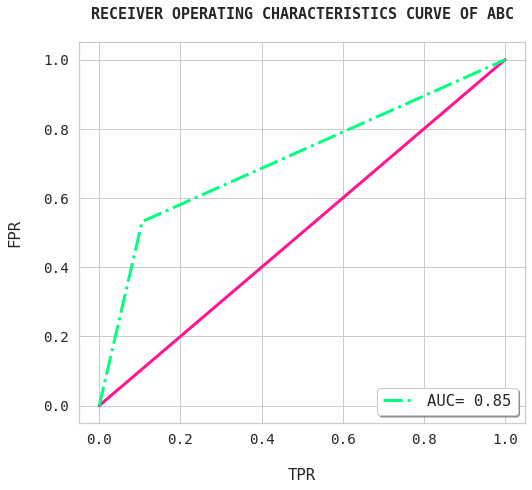

In [106]:
#plotting the auc_roc curve
plt.figure(figsize=(8,7))
sns.set(context='notebook',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
plt.plot([0,1],[0,1],color='deeppink',linestyle="-",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % AUC,color='springgreen',lw=3,linestyle='-.')
plt.legend(loc='lower right',fontsize='medium',shadow=True)
plt.xlabel("\nTPR")
plt.ylabel('FPR\n')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE OF ABC\n',size=15,weight='bold',loc='center')
plt.show()

In [108]:
joblib.dump(abc,'INSURANCE_FRAUD_ABC.pkl')

['INSURANCE_FRAUD_ABC.pkl']